## Notebook for publication ready plots for the thesis

In [67]:
from stareg.star_model import StarModel
from stareg.bspline import Bspline
import plotly.graph_objects as go
import numpy as np 
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

np.random.seed(1)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from pylab import cm
%matplotlib inline

#mpl.rcParams["font.family"] = "sans-serif"
#mpl.rcParams["font.sans-serif"] = "Computer Modern Sans Serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["axes.linewidth"] = 2

colors = cm.get_cmap("tab10", 10)

In [270]:
x = np.linspace(0,1,100)
y_true = 3*np.sin(3*np.pi*x) + 16*x + 5
y = y_true + np.random.normal(loc=0, scale=0.6, size=len(x))
df = pd.DataFrame(data={"x":x, "y":y, "y_true":y_true})

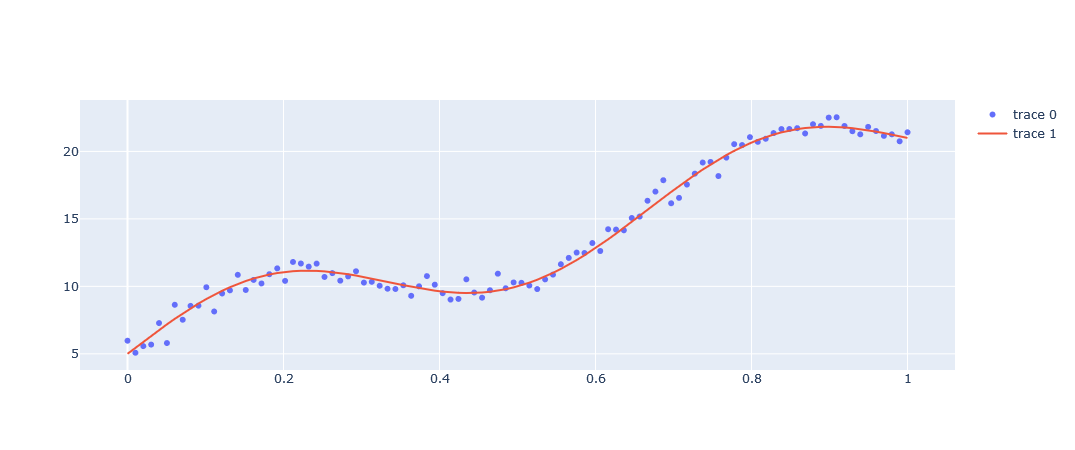

In [71]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["x"], y=df["y"], mode="markers"))
fig.add_trace(go.Scatter(x=df["x"], y=df["y_true"], mode="lines"))

In [76]:
m_smooth = (("s(1)", "none", 10, (0, 0), "equidistant"),)
m_wiggly = (("s(1)", "none", 50, (0, 0), "equidistant"),)
m_p = (("s(1)", "none", 50, (100, 0), "equidistant"),)


In [77]:
M_smooth = StarModel(description=m_smooth)
M_wiggly = StarModel(description=m_wiggly)
M_p = StarModel(description=m_p)

In [78]:
M_smooth.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)
M_wiggly.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)
M_p.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)

ypred_s = M_smooth.basis @ M_smooth.coef_
ypred_w = M_wiggly.basis @ M_wiggly.coef_
ypred_p = M_wiggly.basis @ M_wiggly.coef_

df_fit = pd.DataFrame(data={"fit_s":M_smooth.basis @ M_smooth.coef_, "fit_w":M_wiggly.basis @ M_wiggly.coef_, "fit_p": M_p.basis @ M_p.coef_})

dfp = pd.concat([df, df_fit], axis=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


### **Plot B-spline fit and basis functions**

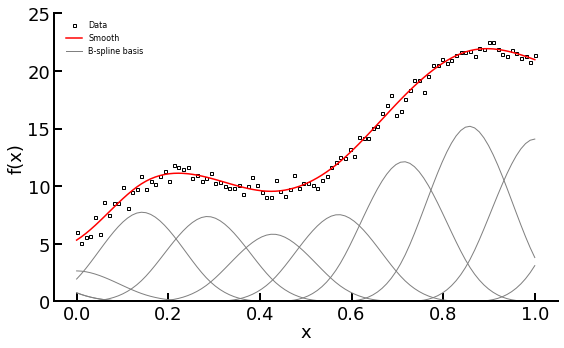

In [303]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0, 0, 1, 1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=8, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=8, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=3, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(x, dfp["fit_s"], color="red", label="Smooth")

for i in range(M_smooth.basis.shape[1]):
    ax.plot(x, M_smooth.basis[:,i]*M_smooth.coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax.plot(x, M_smooth.basis[:,i]*M_smooth.coef_[i], color="grey", linewidth=1, label="B-spline basis")
        
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=0, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))


ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=8)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\smooth_bf.pdf',  transparent=False, bbox_inches='tight')

### **Plot low and high number of splines**

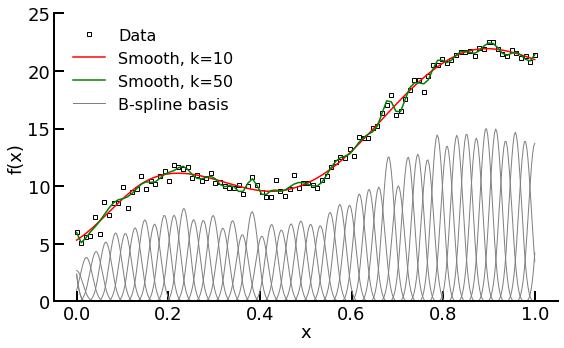

In [304]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(x, dfp["fit_s"], color="red", label="Smooth, k=10")
ax.plot(x, dfp["fit_w"], color="green", label="Smooth, k=50")

# create finer B-spline basis for plotting
xplot = np.linspace(0,1,400)
BS = Bspline()
BS.bspline_basis(x_data=xplot, k=M_wiggly.basis.shape[1])
for i in range(M_wiggly.basis.shape[1]):
    ax.plot(xplot, BS.basis[:,i]*M_wiggly.coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax.plot(xplot, BS.basis[:,i]*M_wiggly.coef_[i], color="grey", linewidth=1, label="B-spline basis")
        
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=0, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\smooth_wiggly_bf.pdf', transparent=False, bbox_inches='tight')

### **Plot P-splines for several $\lambda_s$ values**

In [107]:
n = 50
m_p_m2 = (("s(1)", "none", n, (10**-2, 0), "equidistant"),)
m_p_0 = (("s(1)", "none", n, (10**0, 0), "equidistant"),)
m_p_2 = (("s(1)", "none", n, (10**2, 0), "equidistant"),)
m_p_4 = (("s(1)", "none", n, (10**4, 0), "equidistant"),)
m_p_6 = (("s(1)", "none", n, (10**6, 0), "equidistant"),)
m_p_8 = (("s(1)", "none", n, (10**8, 0), "equidistant"),) 


M_p_m2 = StarModel(description=m_p_m2).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_0 = StarModel(description=m_p_0).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_2 = StarModel(description=m_p_2).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_4 = StarModel(description=m_p_4).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_6 = StarModel(description=m_p_6).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_8 = StarModel(description=m_p_8).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)

ypred_p_m2 = M_p_m2.basis @ M_p_m2.coef_
ypred_p_0 = M_p_0.basis @ M_p_0.coef_
ypred_p_2 = M_p_2.basis @ M_p_2.coef_
ypred_p_4 = M_p_4.basis @ M_p_4.coef_
ypred_p_6 = M_p_6.basis @ M_p_6.coef_
ypred_p_8 = M_p_8.basis @ M_p_8.coef_

df_ps = pd.DataFrame(data={"x":x, "y":y, "yp_m2":ypred_p_m2, "yp_0":ypred_p_0, "yp_2":ypred_p_2, "yp_4":ypred_p_4, "yp_6":ypred_p_6, "yp_8":ypred_p_8 })

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


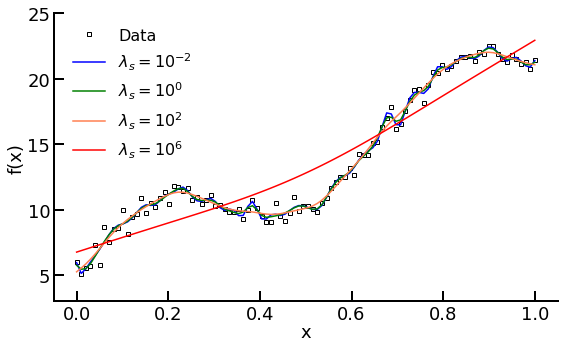

In [305]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)                                                            
ax.plot(x, df_ps["yp_m2"], color="blue", label=r"$\lambda_s = 10^{-2}$")
ax.plot(x, df_ps["yp_0"], color="green", label=r"$\lambda_s = 10^{0}$")
ax.plot(x, df_ps["yp_2"], color="coral", label=r"$\lambda_s = 10^{2}$")
ax.plot(x, df_ps["yp_6"], color="red", label=r"$\lambda_s = 10^{6}$")

       
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=3, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\p_splines.pdf', transparent=False, bbox_inches='tight')

## **Monotonicity constraint fit**

In [271]:
n = 30
m_base = (("s(1)", "none", n, (0.1, 0), "equidistant"),)
m_c = (("s(1)", "inc", n, (0.1, 6000), "equidistant"),)

Mbase = StarModel(description=m_base).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0)
Mcon = StarModel(description=m_c).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0)

ypred_b = Mbase.basis @ Mbase.coef_
ypred_c = Mcon.basis @ Mcon.coef_

df_c = pd.concat((df, pd.DataFrame(data={"yp_b":ypred_b, "yp_c":ypred_c})), axis=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


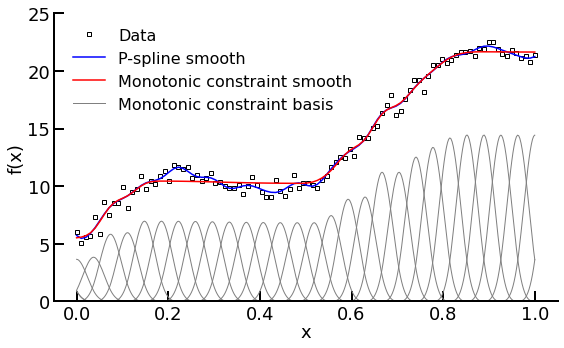

In [306]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(x, df_c["yp_b"], color="blue", label="P-spline smooth")
ax.plot(x, df_c["yp_c"], color="red", label="Monotonic constraint smooth")

# create finer B-spline basis for plotting
xplot = np.linspace(0,1,400)
BS = Bspline()
BS.bspline_basis(x_data=xplot, k=Mcon.basis.shape[1])
for i in range(Mcon.basis.shape[1]):
    ax.plot(xplot, BS.basis[:,i]*Mcon.coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax.plot(xplot, BS.basis[:,i]*Mcon.coef_[i], color="grey", linewidth=1, label="Monotonic constraint basis")
        
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=0, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\inc_spline.pdf', transparent=False, bbox_inches='tight')

## **2D Test Function**

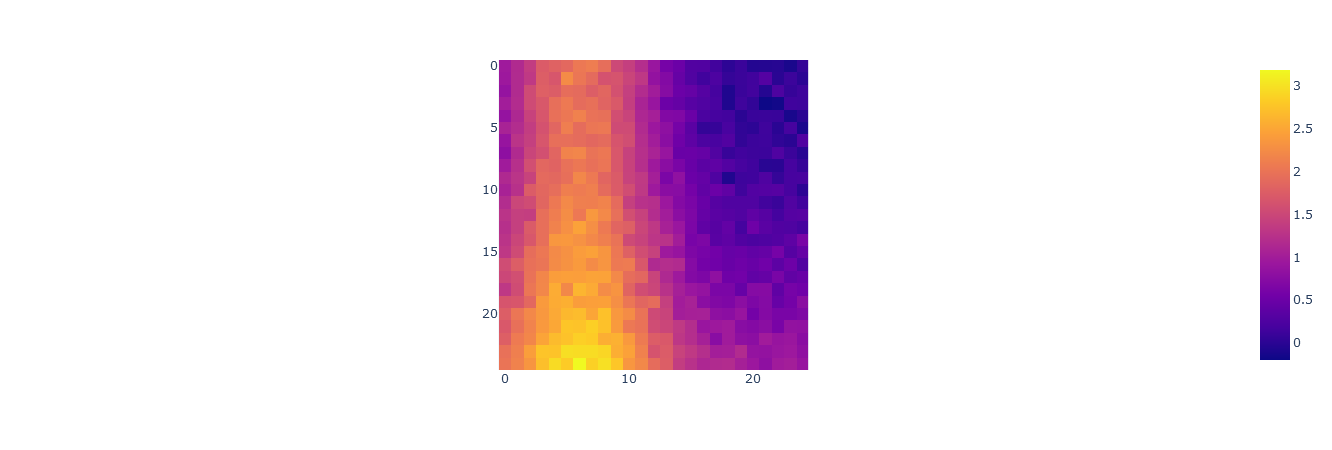

In [84]:
n = 25
x1, x2 = np.linspace(0,1,n), np.linspace(0,1,n)
x1g, x2g = np.meshgrid(x1, x2)
X = np.vstack((x1g.ravel(), x2g.ravel())).T
def f(x1, x2):
    return 2*np.exp(-((x1 - 0.25)**2/0.08)) + x2**2 + np.random.normal(loc=0.0, scale=0.1, size=x1.shape)
y2d = f(X[:,0], X[:,1])
df = {"x1":X[:,0], "x2":X[:,1], "y":y2d}
px.imshow(y2d.reshape(25,25))

In [85]:
m = ( ("s(1)", "peak", 50, (1, 6000), "equidistant"),
       ("s(2)", "inc", 50, (1, 6000), "equidistant"),
    )
M = StarModel(description=m)
M.fit(X=X, y=y2d, plot_=0, verbose=False, max_iter=5)

StarModel(s(1)={'constraint': 'peak', 'knot_type': 'equidistant',
                'lam': {'constraint': 6000, 'smoothness': 1}, 'n_param': 50},
          s(2)={'constraint': 'inc', 'knot_type': 'equidistant',
                'lam': {'constraint': 6000, 'smoothness': 1}, 'n_param': 50})

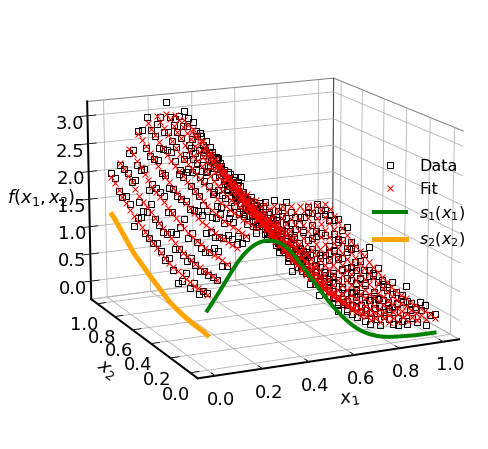

In [87]:
fig = plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')

ax.grid(True)
ax.xaxis.pane.set_edgecolor("black")
ax.yaxis.pane.set_edgecolor("black")
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(elev=15, azim=135+110)

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.4
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.4
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.4
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.4
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.4

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.zaxis.set_major_locator(MultipleLocator(0.5))

ax.plot(xs=X[:,0], ys=X[:,1], zs=y2d, marker="s", label="Data", color="black", markersize=6, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax.plot(xs=X[:,0], ys=X[:,1], zs=M.basis@M.coef_, label="Fit", marker="x", color="red", markersize=6, markerfacecolor='none', markeredgecolor="red", linewidth=0)

ax.set_xlabel(r"$x_1$", labelpad=10)
ax.set_ylabel(r"$x_2$", labelpad=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$f(x_1,x_2)$", labelpad=10, rotation=0)

xplot, B = np.linspace(0,1,200), Bspline()
B.bspline_basis(x_data=xplot, k=50)
ax.plot(xs=xplot, ys=np.zeros(200), zs=B.basis@M.smooths["s(1)"].coef_, linewidth=4, label=r"$s_1(x_1)$", color="green")
ax.plot(xs=np.zeros(200), ys=xplot, zs=B.basis@M.smooths["s(2)"].coef_, linewidth=5, label=r"$s_2(x_2)$", color="orange")
#ax.plot(xs=x1g.ravel(), ys=x2g.ravel(), zs=M.smooths["t(1,2)"].basis@M.smooths["t(1,2)"].coef_)

ax.legend(bbox_to_anchor=(0.995, 0.685), loc="upper right", frameon=False, fontsize=16)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\2d_example.pdf', transparent=False, bbox_inches='tight')

### **Linear and quadratic Splines**

In [160]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from stareg.bspline import Bspline

x = np.linspace(0,1,1000)
Blin, Bquad, Bcubic = Bspline(), Bspline(), Bspline()
Blin.bspline_basis(x_data=x, k=10, m=0, type_="equidistant")
Bquad.bspline_basis(x_data=x, k=10, m=1, type_="equidistant")
Bcubic.bspline_basis(x_data=x, k=10, m=2)

[Text(0.375, 0, '$x_1$'),
 Text(0.5, 0, '$x_2$'),
 Text(0.625, 0, '$x_3$'),
 Text(0.75, 0, '$x_4$')]

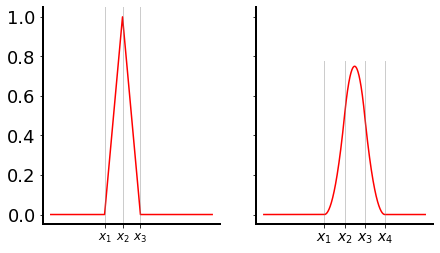

In [161]:
# Create two subplots 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(7,4))
# Customized the left plot
ax1.plot(x, Blin.basis[:,6], color="red", label=r"Spline")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.axvline(Blin.knots[6], 0, Blin.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax1.axvline(Blin.knots[7], 0, Blin.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax1.axvline(Blin.knots[8], 0, Blin.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax1.set_xticks([Blin.knots[6], Blin.knots[7], Blin.knots[8]])
ax1.set_xticklabels([r"$x_1$", r"$x_2$", r"$x_3$"], size=12)

# Customize the right plot
ax2.plot(x, Bquad.basis[:,6], color="red", label=r"Spline")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.axvline(Bquad.knots[6], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.axvline(Bquad.knots[7], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.axvline(Bquad.knots[8], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.axvline(Bquad.knots[9], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.set_xticks([Bquad.knots[6],Bquad.knots[7],Bquad.knots[8], Bquad.knots[9]])
ax2.set_xticklabels([r"$x_1$", r"$x_2$", r"$x_3$", r"$x_4$"], size=14)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\Thesis_WorkingDirectoryplots\\linear_and_quadratic_spline.pdf', transparent=False, bbox_inches='tight')

In [3]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pioz
from plotly.subplots import make_subplots
from stareg.star_model import StarModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## **STATIC FUNCTION FITTING 1** 

**Example with a knick**

In [86]:
np.random.seed(1)
# generate some data
n = 100
x = np.linspace(0,2.5,n)
knick = 0.8
noise = np.random.normal(loc=0.0, scale=0.5, size=n)

y = 20*np.array([0 if x <= knick else np.sin(x-knick) for x in x])
yn = y + noise

df = pd.DataFrame(data=dict(x=x, y=y, yn=yn))

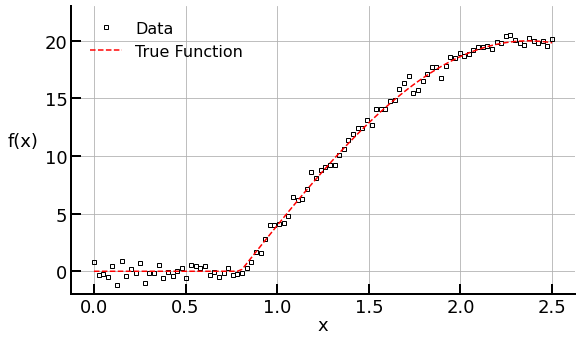

In [89]:
# plot the data
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ip = 1
ax.plot(df["x"][::ip], df["yn"][::ip], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax.plot(df["x"][::ip], df["y"][::ip], color="red", label="True Function", linestyle="--")
 
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=22, rotation=0)
ax.set_ylim(bottom=-2, top=23)
ax.grid()
ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

path = "..\\..\\Thesis_WorkingDirectory\\thesisplots\\"
# plt.savefig(path+"exp_inc1.pdf", transparent=False, bbox_inches="tight")

((ax11, ax12), (ax21, ax22)) = axs

# remove the splines from all subwindows
for ax in axs.ravel():
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
# remove the tick labels for the constraint violation plot
ax21.yaxis.set_ticks([])
##########################################################################
##########################################################################
## plot the data
##########################################################################
##########################################################################
np_ = 2 if n==250 else 25
ax11.plot(df_train["xbeta"][::np_], df_train["ybeta"][::np_], color="black", label="Data", 
          marker="s", markersize=4, 
          markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax11.plot(df_train["xbeta"], df_train["fit_con_beta_equidistant"], color="red", label="Constraint Fit")
ax11.plot(df_train["xbeta"], df_train["fit_unc_beta_equidistant"], color="blue", label="Unconstraint Fit", 
          linestyle="--")
ax11.plot(df_train["xtrue"], df_train["ytrue"], color="black", linestyle=":",alpha=0.4, label="True Function")
ax11.set_title(r"Equidistant Knots $\lambda_s ={}$".format(round(Models_con_beta[0].smooths["s(1)"].lam["smoothness"], 4)))
ax11.set_ylabel("f(x)", labelpad=2)
ax11.set_xlabel("x", labelpad=0)
ax11.set_ylim(bottom=-0.2, top=df_train["ybeta"].max()*1.1)
# plot basis functions
for i in range(Models_con_beta[0].basis.shape[1]):
    if ccoef_equidistant[i]:
        ax11.plot(df_train["xbeta"], Models_con_beta[0].basis[:,i]*Models_con_beta[0].coef_[i], 
                  color="red", linewidth=1, linestyle=":")
    else:
        ax11.plot(df_train["xbeta"], Models_con_beta[0].basis[:,i]*Models_con_beta[0].coef_[i], 
                  color="grey", linewidth=1, linestyle=":")

# plot quantile based fit
ax12.spines["right"].set_visible(False)
ax12.spines["top"].set_visible(False)

ax12.plot(df_train["xbeta"][::np_], df_train["ybeta"][::np_], color="black", label="Data", 
          marker="s", markersize=4, 
          markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax12.plot(df_train["xbeta"], df_train["fit_con_beta_quantile"], color="red", label="Constraint Fit")
ax12.plot(df_train["xbeta"], df_train["fit_unc_beta_quantile"], color="blue", label="Unconstraint Fit", 
          linestyle="--")
ax12.plot(df_train["xtrue"], df_train["ytrue"], color="black", linestyle=":",alpha=0.4, label="True Function")
ax12.set_title(r"Quantile based Knots $\lambda_s = {}$".format(round(Models_con_beta[1].smooths["s(1)"].lam["smoothness"], 4)))
ax12.set_ylabel("f(x)", labelpad=2)
ax12.set_xlabel("x", labelpad=0)
ax12.set_ylim(bottom=-0.2, top=df_train["ybeta"].max()*1.1)
for i in range(Models_con_beta[1].basis.shape[1]):
    if ccoef_quantile[i]:
        ax12.plot(df_train["xbeta"], Models_con_beta[1].basis[:,i]*Models_con_beta[1].coef_[i], 
                  color="red", linewidth=1, linestyle=":")
    else:
        ax12.plot(df_train["xbeta"], Models_con_beta[1].basis[:,i]*Models_con_beta[1].coef_[i], 
                  color="grey", linewidth=1, linestyle=":")
ax12.plot(0, 0, color="grey", linewidth=1, linestyle=":", label="Spline basis")
ax12.plot(0, 0, color="red", linewidth=1, linestyle=":", label="Spline basis w. constraint violation")

ax12.legend(bbox_to_anchor=(0.9, 1.), loc="upper left", frameon=True, fontsize=16, )

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_left_skewed_data_seed_{}.png'.format(seed), transparent=False, bbox_inches='tight')
##########################################################################
##########################################################################
## plot the constraint violation for fit
##########################################################################
##########################################################################
ax21.bar(x=df_train["xbeta"].values[:-1], color="red", 
         height=cfit_equidistant, width=0.015)
ax22.bar(x=df_train["xbeta"].values[:-1], color="red", 
         height=cfit_quantile, width=0.015, label="Constraint Violation of the Fit")
ax22.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=True, fontsize=16)

plt.suptitle(r"Beta({},{})-distribution data".format(beta_a, beta_b))

path = "..\\..\\Thesis_WorkingDirectory\\thesisplots\\"
if experiment=="l":
    fname = "exp_left_skewed_data_ndata_{}_rseed_{}".format(n, seed)
    print("Left Skewed Data Distribution")
elif experiment=="m":
    fname = "exp_middle_skewed_data_ndata_{}_rseed_{}".format(n, seed)
    print("Middle Skewed Data Distribution")
elif experiment=="r":
    fname = "exp_right_skewed_data_ndata_{}_rseed_{}".format(n, seed)
    print("Right Skewed Data Distribution")

#plt.savefig(path+"exp_beta\\"+fname+".png", transparent=False, bbox_inches='tight')

f.show()


In [92]:
# train-test split
df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)
df_train = df_train.sort_index()
df_test = df_test.sort_index()

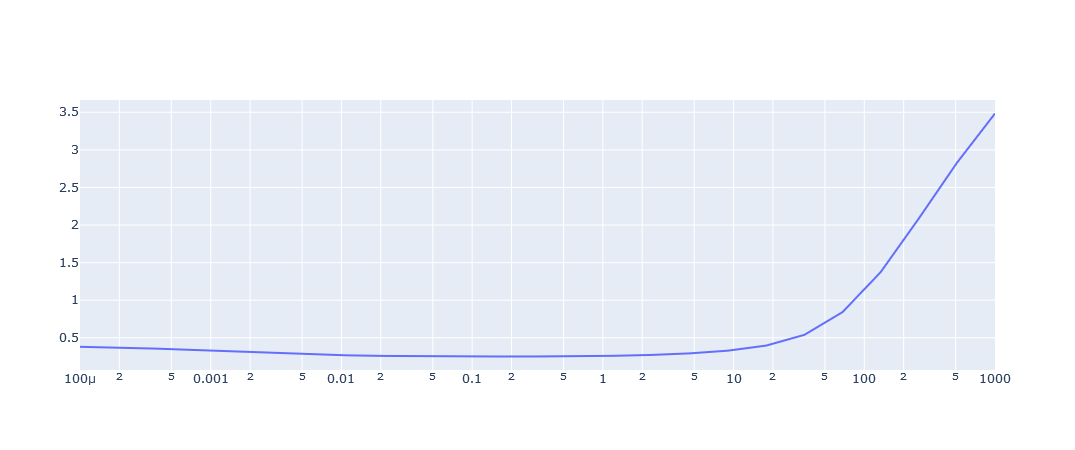

Best smoothing paramter found is {'smoothness': 0.16155980984398746, 'constraint': 161.55980984398747}


In [93]:
# Unconstraint Model
m_unc = (("s(1)", "none", 35, (1, 0), "equidistant"),)
M_unc = StarModel(description=m_unc)
M_unc.GCV_smoothingParameter(X=df_train["x"].values.reshape(-1,1), y=df_train["yn"], n_grid=25)
M_unc.plot_GCV_curve()
best_lam_s = M_unc.smooths["s(1)"].lam["smoothness"]
print(f"Best smoothing paramter found is {M_unc.smooths['s(1)'].lam}")
yfit_unc = M_unc.basis @ M_unc.coef_

B = Bspline()
B.bspline_basis(x_data=df_test["x"].values, k=M_unc.coef_list[-1])
ypred_unc = B.basis @ M_unc.coef_


In [94]:
# Constraint Model
m = (("s(1)", "inc", 35, (best_lam_s, best_lam_s*1000), "equidistant"), )
M_con = StarModel(description=m)

M_con.fit(X=df_train["x"].values.reshape(-1,1), y=df_train["yn"], plot_=False)
yfit_con = M_con.basis @ M_con.coef_

B = Bspline()
B.bspline_basis(x_data=df_test["x"].values, k=M_con.coef_list[-1])
ypred_con = B.basis @ M_con.coef_

In [95]:
print("".center(50, "-"))
print("MSE unconstraint on noisy samples: ".ljust(35), mean_squared_error(df_train["yn"], yfit_unc).round(8))
print("MSE constraint on noisy samples: ".ljust(35), mean_squared_error(df_train["yn"], yfit_con).round(8))
print("".center(50, "-"))
print("MSE unconstraint on true function: ".ljust(35), mean_squared_error(df_train["y"], yfit_unc).round(8))
print("MSE constraint on true function: ".ljust(35), mean_squared_error(df_train["y"], yfit_con).round(8))
print("".center(50, "-"))
print("MSE unconstraint on test set: ".ljust(35), mean_squared_error(df_test["yn"], ypred_unc).round(8))
print("MSE constrain on test set: ".ljust(35), mean_squared_error(df_test["yn"], ypred_con).round(8))

--------------------------------------------------
MSE unconstraint on noisy samples:  0.16389957
MSE constraint on noisy samples:    0.17491043
--------------------------------------------------
MSE unconstraint on true function:  0.0146074
MSE constraint on true function:    0.01220712
--------------------------------------------------
MSE unconstraint on test set:       21.78962417
MSE constrain on test set:          21.75168496


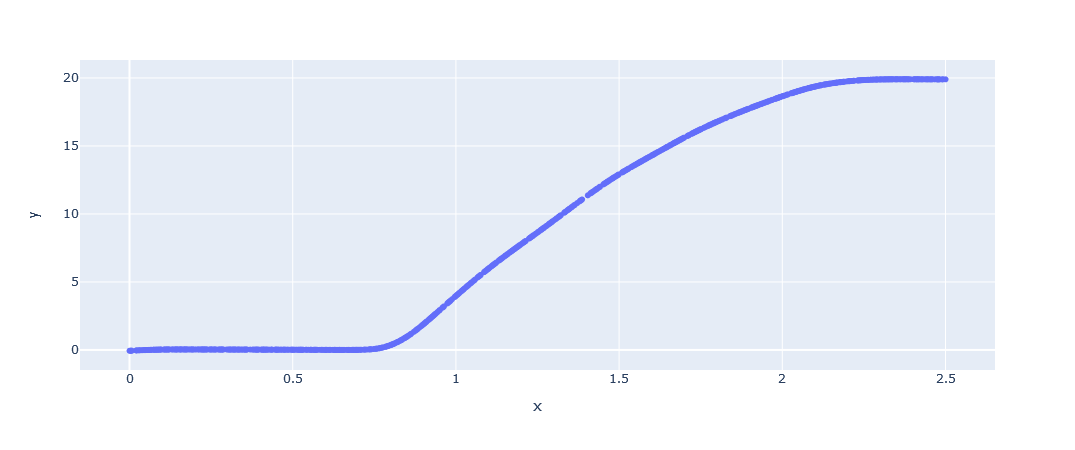

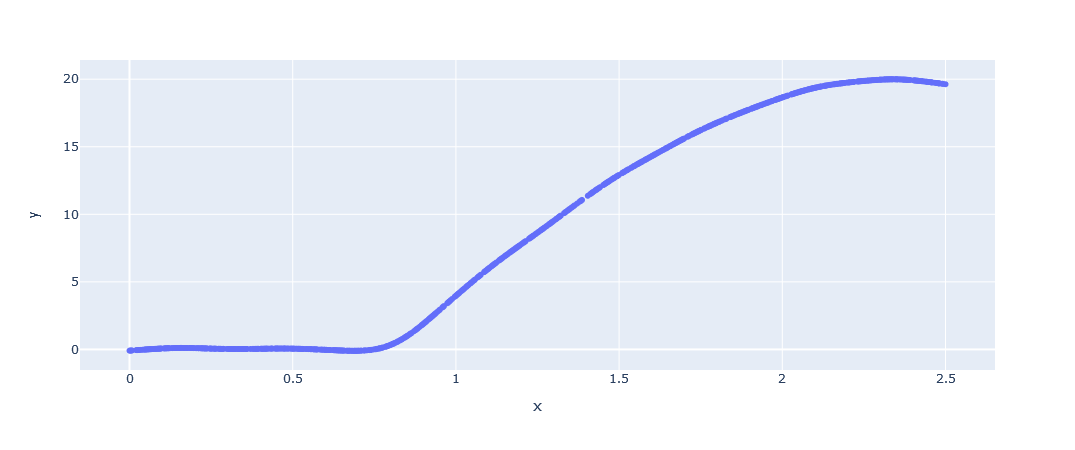

In [85]:
px.scatter(x=df_train["x"], y=yfit_con).show()
px.scatter(x=df_train["x"], y=yfit_unc).show()

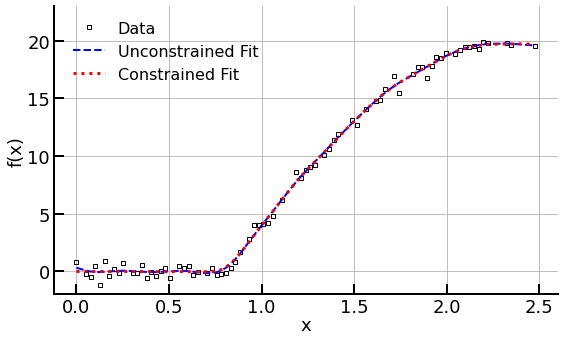

In [100]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ip = 1
ax.plot(df_train["x"][::ip], df_train["yn"][::ip], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(df_train["x"], yfit_unc, color="blue", label="Unconstrained Fit", linestyle="--", linewidth=2)
ax.plot(df_train["x"], yfit_con, color="red", label="Constrained Fit", linestyle=":", linewidth=3)
 
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=-2, top=23)
ax.grid()
ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

# plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_inc1.pdf', transparent=False, bbox_inches='tight')

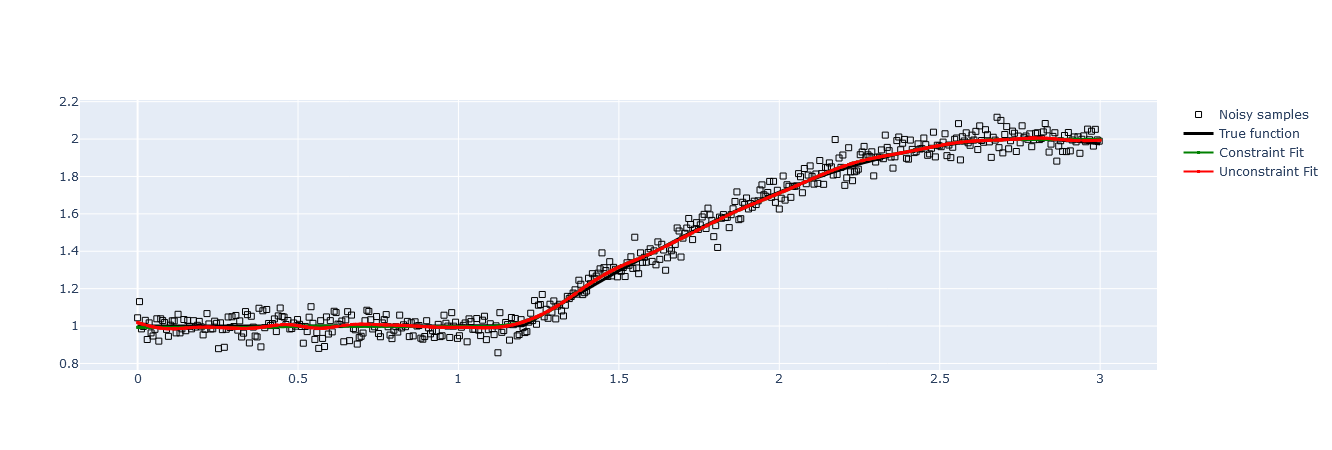

In [144]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x[::2], y=yn[::2], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))
fig.add_trace(go.Scatter(x=x, y=y, mode="lines", line=dict(width=3, color="black"), name="True function"))
fig.add_trace(go.Scatter(x=df_train["x"], y=ypred_con, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="Constraint Fit"))
fig.add_trace(go.Scatter(x=df_train["x"], y=ypred_unc, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
# fig.write_image("example_inc.png")


## **STATIC FUNCTION FITTING 2**

**Gauss + Linear**

In [1]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pioz
from plotly.subplots import make_subplots
from stareg.star_model import StarModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import colorednoise as cn

In [2]:
n = 500
x = np.linspace(0,1,n)
noise = np.random.normal(loc=0.0, scale=0.1, size=n)

y = 2*np.exp(-(x-0.5)**2 / 0.05) + 2.5*x
yn = y + noise

df = pd.DataFrame(data=dict(x=x, y=y, yn=yn))

In [397]:
# train-test split
df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)
df_train = df_train.sort_index()
df_test = df_test.sort_index()

In [398]:
df_train.max()

x     1.000000
y     3.289405
yn    3.552974
dtype: float64

In [399]:
# Unconstraint Model
m_unc = (("s(1)", "none", 35, (1, 1000), "equidistant"),)
M_unc = StarModel(description=m_unc)
M_unc.GCV_smoothingParameter(X=df_train["x"].values.reshape(-1,1), y=df_train["yn"], n_grid=25)
best_lam_s = M_unc.smooths["s(1)"].lam["smoothness"]
print(f"Best smoothing paramter found is {M_unc.smooths['s(1)'].lam}")
yfit_unc = M_unc.basis @ M_unc.coef_

B = Bspline()
B.bspline_basis(x_data=df_test["x"].values, k=M_unc.coef_list[-1])
ypred_unc = B.basis @ M_unc.coef_


Best smoothing paramter found is {'smoothness': 1.2115, 'constraint': 1211.5}


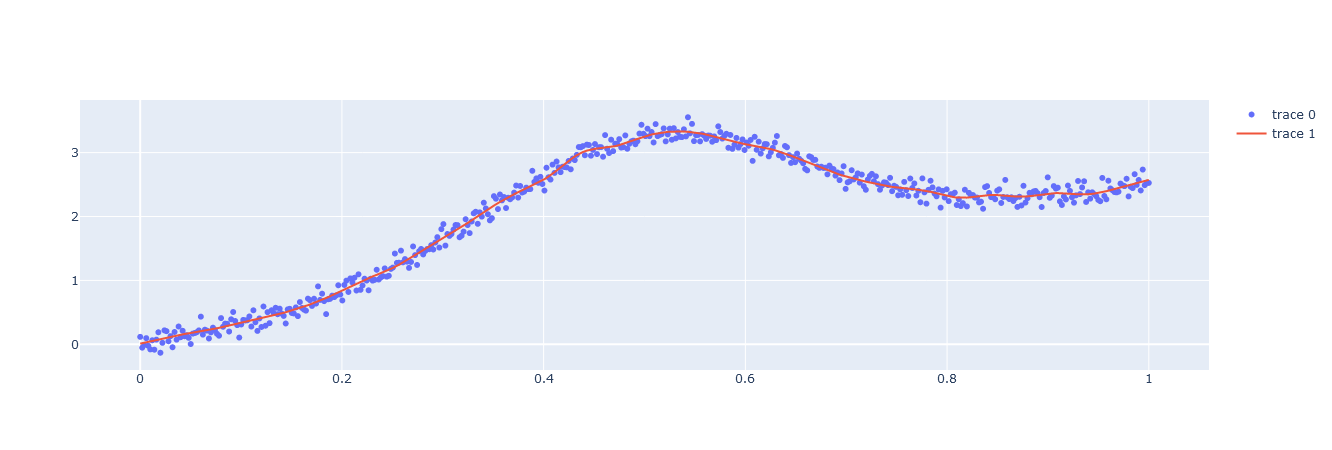

In [400]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=yn, mode="markers"))
fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_unc))

In [382]:
# Constraint Model peak
m = (("s(1)", "peak", 35, (best_lam_s, best_lam_s*1000), "equidistant"), )
M_con_peak = StarModel(description=m)

M_con_peak.fit(X=df_train["x"].values.reshape(-1,1), y=df_train["yn"], plot_=False)
yfit_con_peak = M_con_peak.basis @ M_con_peak.coef_

B = Bspline()
B.bspline_basis(x_data=df_test["x"].values, k=M_con_peak.coef_list[-1])
ypred_con_peak = B.basis @ M_con_peak.coef_


In [383]:
# Constraint Model peak
m = (("s(1)", "conc", 35, (best_lam_s, best_lam_s*1000), "equidistant"), )
M_con_concave = StarModel(description=m)

M_con_concave.fit(X=df_train["x"].values.reshape(-1,1), y=df_train["yn"], plot_=False)
yfit_con_concave = M_con_concave.basis @ M_con_concave.coef_

B = Bspline()
B.bspline_basis(x_data=df_test["x"].values, k=M_con_concave.coef_list[-1])
ypred_con_concave = B.basis @ M_con_concave.coef_


In [384]:
print("".center(50, "-"))
print("MSE unconstraint on noisy samples: ".ljust(42), mean_squared_error(df_train["yn"], yfit_unc).round(8))
print("MSE concave constraint on noisy samples: ".ljust(42), mean_squared_error(df_train["yn"], yfit_con_concave).round(8))
print("MSE peak constraint on noisy samples: ".ljust(42), mean_squared_error(df_train["yn"], yfit_con_peak).round(8))
print("".center(50, "-"))
print("MSE unconstraint on true function: ".ljust(42), mean_squared_error(df_train["y"], yfit_unc).round(8))
print("MSE concave constraint on true function: ".ljust(42), mean_squared_error(df_train["y"], yfit_con_concave).round(8))
print("MSE peak constraint on true function: ".ljust(42), mean_squared_error(df_train["y"], yfit_con_peak).round(8))
print("".center(50, "-"))
print("MSE unconstraint on test set: ".ljust(42), mean_squared_error(df_test["yn"], ypred_unc).round(8))
print("MSE concave constrait on test set: ".ljust(42), mean_squared_error(df_test["yn"], ypred_con_concave).round(8))
print("MSE peak constrait on test set: ".ljust(42), mean_squared_error(df_test["yn"], ypred_con_peak).round(8))


--------------------------------------------------
MSE unconstraint on noisy samples:         0.00862786
MSE concave constraint on noisy samples:   0.00995325
MSE peak constraint on noisy samples:      0.00931174
--------------------------------------------------
MSE unconstraint on true function:         0.00080751
MSE concave constraint on true function:   0.00075285
MSE peak constraint on true function:      0.00090407
--------------------------------------------------
MSE unconstraint on test set:              0.10109949
MSE concave constrait on test set:         0.10120349
MSE peak constrait on test set:            0.10201514


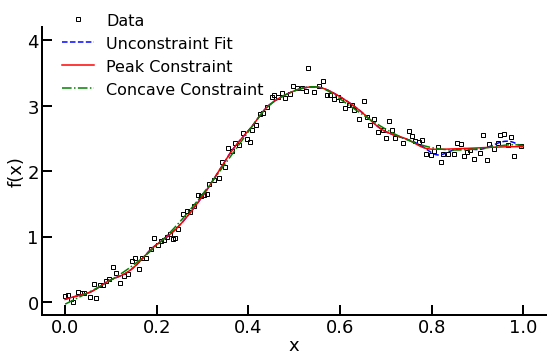

In [394]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(df_train["x"][::3], df_train["yn"][::3], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(df_train["x"], M_unc.basis @ M_unc.coef_, color="blue", label="Unconstraint Fit", linestyle="--")
ax.plot(df_train["x"], M_con_peak.basis @ M_con_peak.coef_, color="red", label="Peak Constraint")
ax.plot(df_train["x"], M_con_concave.basis @ M_con_concave.coef_, color="green", label="Concave Constraint", linestyle="-.")

#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=-0.2, top=4.2)

ax.legend(bbox_to_anchor=(0.01, 1.1), loc="upper left", frameon=False, fontsize=16)

# plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_peak1.png', transparent=False, bbox_inches='tight')

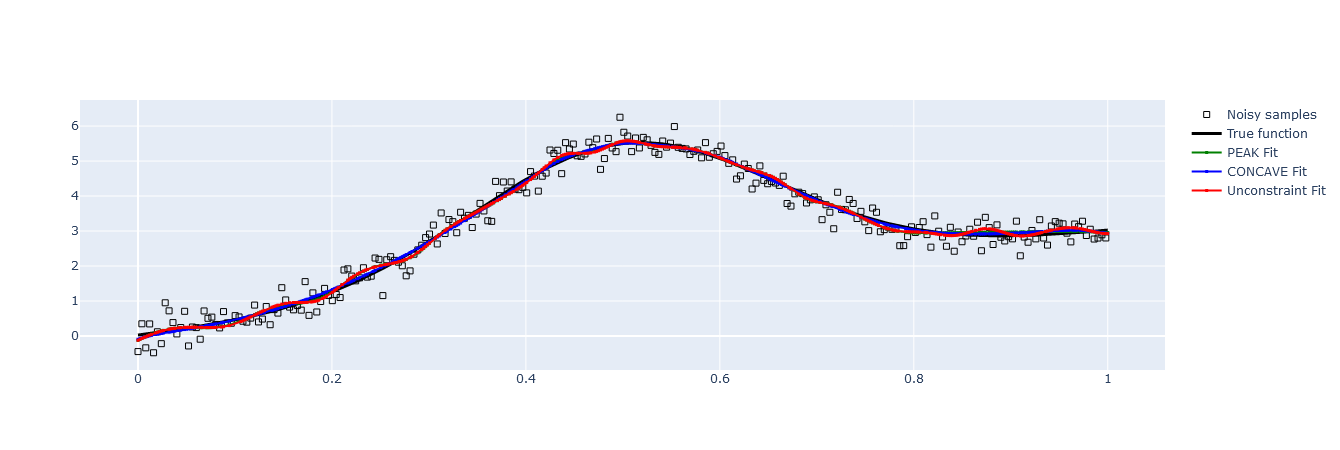

In [354]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x[::2], y=yn[::2], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))
fig.add_trace(go.Scatter(x=x, y=y, mode="lines", line=dict(width=3, color="black"), name="True function"))
fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_con_peak, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="PEAK Fit"))
fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_con_concave, mode="markers+lines", marker=dict(size=3, symbol=1, color="blue"), name="CONCAVE Fit"))
fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_unc, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
# fig.write_image("example_inc.png")


## **Constraint vs. Noise**

In [4]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pioz
from plotly.subplots import make_subplots
from stareg.star_model import StarModel
from stareg.bspline import Bspline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import colorednoise as cn

### **Noise Levels**

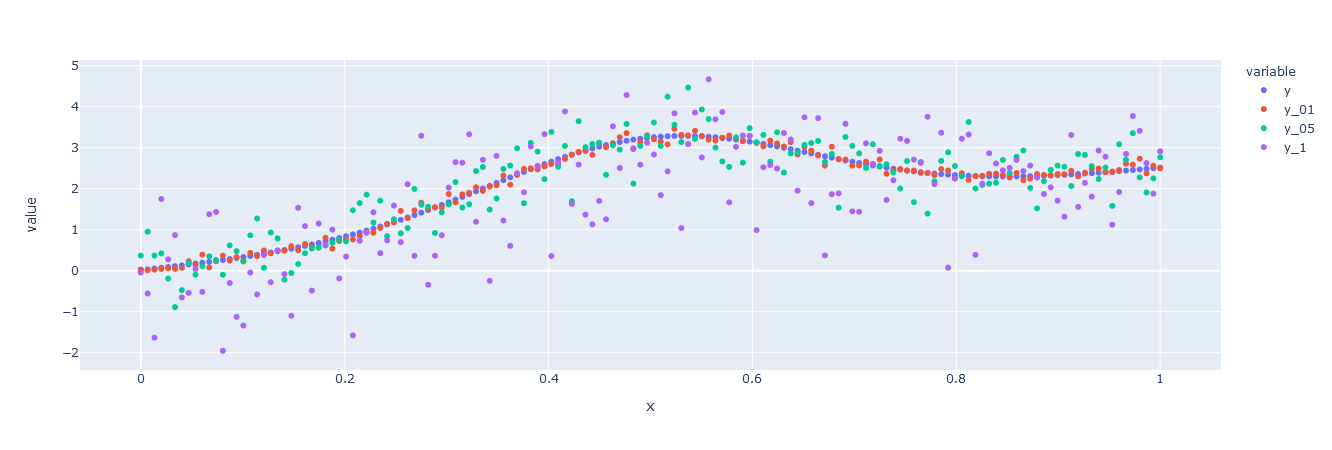

In [3]:
n = 150
x = np.linspace(0,1,n)

noise_01 = np.random.normal(loc=0.0, scale=0.1, size=n)
noise_05 = np.random.normal(loc=0.0, scale=0.5, size=n)
noise_1  = np.random.normal(loc=0.0, scale=1, size=n)

y = 2*np.exp(-(x-0.5)**2 / 0.05) + 2.5*x

df = pd.DataFrame(data=dict(x=x, y=y, y_01=y+noise_01, y_05=y+noise_05, y_1=y+noise_1))
px.scatter(df, x="x", y=["y", "y_01", "y_05", "y_1"], width=10)

In [4]:
# train-test split
df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)
df_train = df_train.sort_index()
df_test = df_test.sort_index()

In [6]:
df_train.max()

x       1.000000
y       3.289349
y_01    3.459870
y_05    4.467059
y_1     4.283794
dtype: float64

Best smoothing paramter found is {'smoothness': 68.1292, 'constraint': 68129.2}


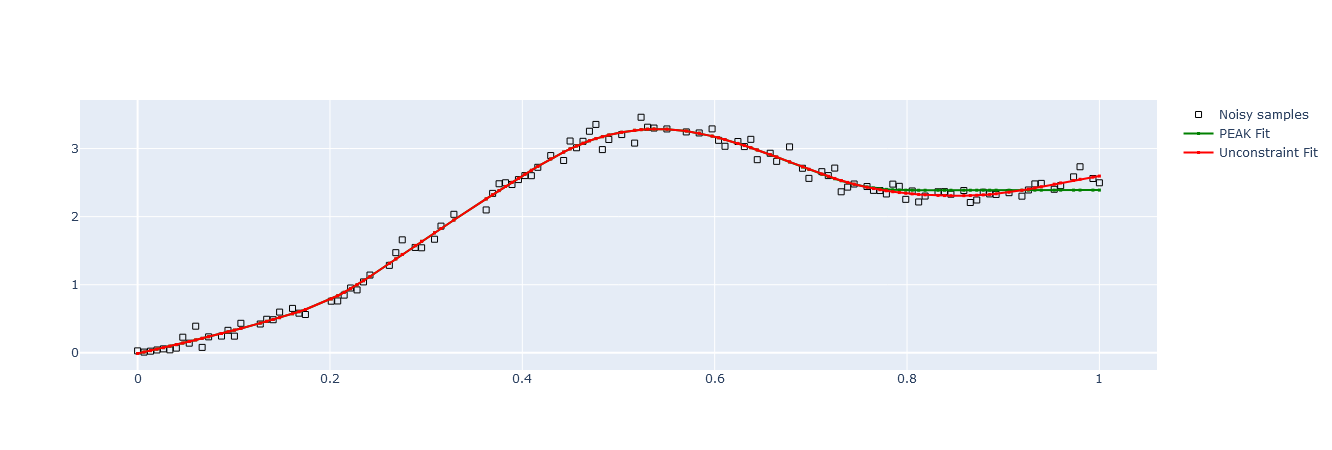

Best smoothing paramter found is {'smoothness': 2.3714, 'constraint': 2371.4}
Smoothing Parameter low -> lam_c set to 6000!


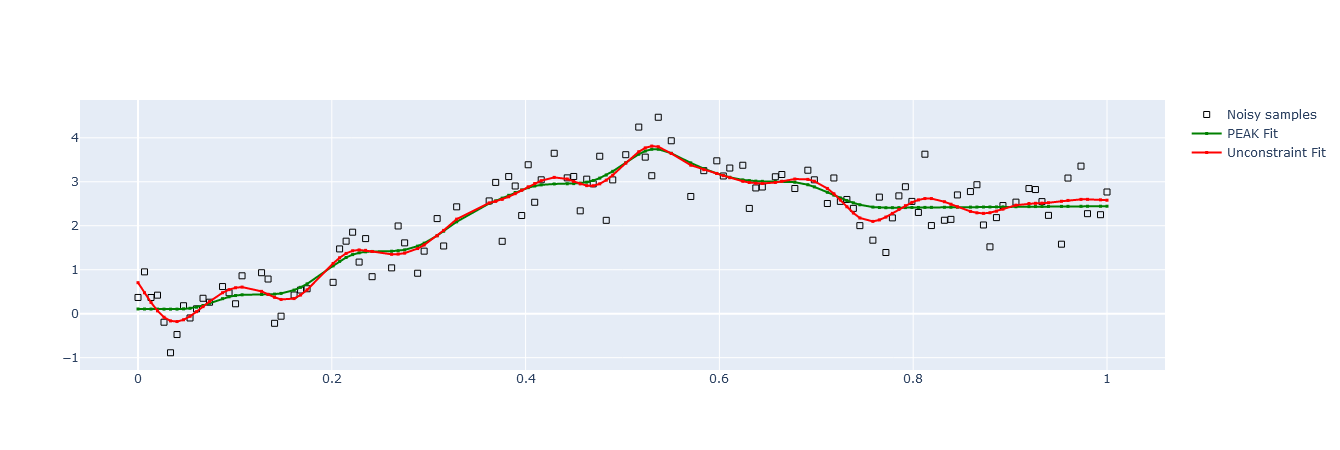

Best smoothing paramter found is {'smoothness': 1000.0, 'constraint': 1000000.0}


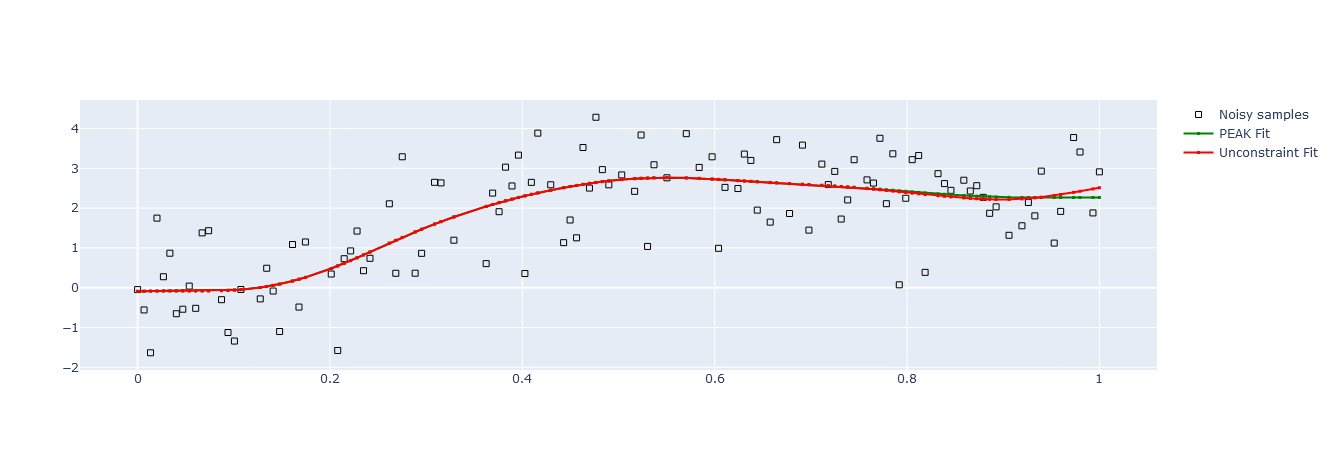

In [10]:
for noise in ["0.01", "0.05", "0.1"]:
# Unconstraint Model
    m_unc = (("s(1)", "none", 35, (1, 0), "equidistant"),)
    M_unc = StarModel(description=m_unc)
    M_unc.GCV_smoothingParameter(X=df_train["x"].values.reshape(-1,1), y=df_train["y_"+noise[2:]], n_grid=25)
    best_lam_s = M_unc.smooths["s(1)"].lam["smoothness"]
    lam_c = 1000*best_lam_s
    print(f"Best smoothing paramter found is {M_unc.smooths['s(1)'].lam}")
    yfit_unc = M_unc.basis @ M_unc.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["x"].values, k=M_unc.coef_list[-1])
    ypred_unc = B.basis @ M_unc.coef_

    if best_lam_s < 6:
        best_lam_s = 6
        lam_c = 6000
        print("Smoothing Parameter low -> lam_c set to 6000!")
    
    # Constraint Model peak
    m_con = (("s(1)", "peak", 35, (best_lam_s, lam_c), "equidistant"), )
    M_con = StarModel(description=m_con)

    M_con.fit(X=df_train["x"].values.reshape(-1,1), y=df_train["y_"+noise[2:]], plot_=False)
    yfit_con = M_con.basis @ M_con.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["x"].values, k=M_con.coef_list[-1])
    ypred_con = B.basis @ M_con.coef_

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train["x"], y=df_train["y_"+noise[2:]], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))
    fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_con, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="PEAK Fit"))
    fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_unc, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
    fig.show()

    df_train["fit_unc_"+noise[2:]] = yfit_unc
    df_train["fit_con_"+noise[2:]] = yfit_con
    df_test["pred_unc_"+noise[2:]] = ypred_unc
    df_test["pred_con_"+noise[2:]] = ypred_con


In [13]:
df_train.head()

x         y      y_01      y_05       y_1  fit_unc_01  fit_con_01  \
0  0.000000  0.013476  0.028783  0.369188 -0.046733   -0.009895   -0.009895   
1  0.006711  0.032176  0.010863  0.951329 -0.558512    0.011199    0.011199   
2  0.013423  0.051119  0.024449  0.367894 -1.634031    0.032487    0.032487   
3  0.020134  0.070331  0.041779  0.421492  1.748770    0.054018    0.054018   
4  0.026846  0.089838  0.058071 -0.193802  0.276239    0.075843    0.075843   

   fit_unc_05  fit_con_05  fit_unc_1  fit_con_1  
0    0.705384    0.106921  -0.089493  -0.091337  
1    0.476135    0.106231  -0.087088  -0.088726  
2    0.256781    0.105429  -0.084879  -0.086309  
3    0.065132    0.104596  -0.082958  -0.084176  
4   -0.081001    0.103815  -0.081417  -0.082417

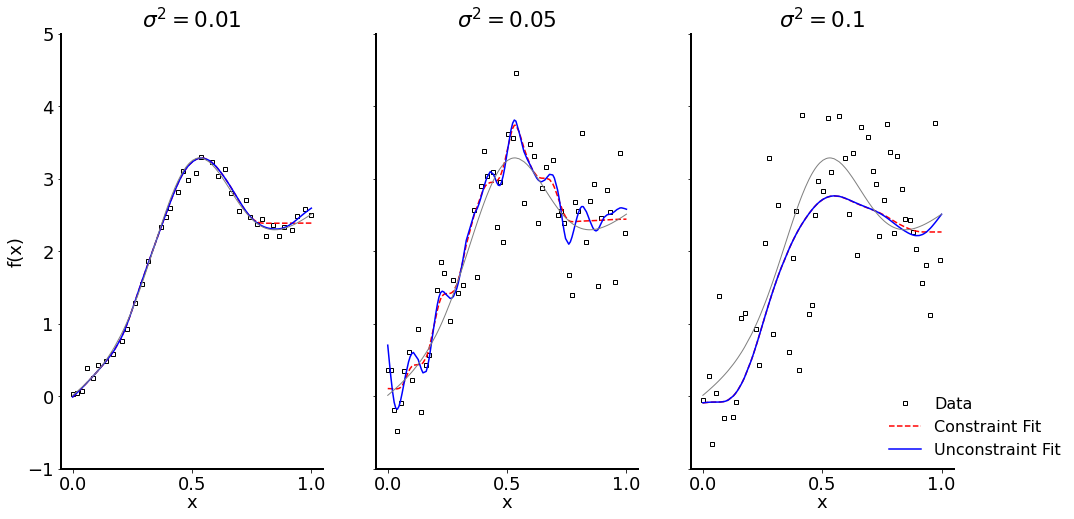

In [21]:
# Create two subplots 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,8))
# Customized the left plot
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.plot(df_train["x"][::3], df_train["y_01"][::3], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax1.plot(df_train["x"], df_train["fit_con_01"], color="red", label="Constraint Fit", linestyle="--")
ax1.plot(df_train["x"], df_train["fit_unc_01"], color="blue", label="Unconstraint Fit")
ax1.plot(df_train["x"], df_train["y"], color="grey", linewidth=1)
ax1.set_title(r"$\sigma^2=0.01$")
ax1.set_ylabel("f(x)", labelpad=2)
ax1.set_xlabel("x", labelpad=0)
ax1.set_ylim(bottom=-0.4, top=4.2)

# Customized the middle plot
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

ax2.plot(df_train["x"][::2], df_train["y_05"][::2], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax2.plot(df_train["x"], df_train["fit_con_05"], color="red", label="Constraint Fit", linestyle="--")
ax2.plot(df_train["x"], df_train["fit_unc_05"], color="blue", label="Unconstraint Fit")
ax2.plot(df_train["x"], df_train["y"], color="grey", linewidth=1)
ax2.set_title(r"$\sigma^2=0.05$")
ax2.set_xlabel("x", labelpad=0)
ax2.set_ylim(bottom=-0.4, top=4.2)

# Customized the left plot
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)

ax3.plot(df_train["x"][::2], df_train["y_1"][::2], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax3.plot(df_train["x"], df_train["fit_con_1"], color="red", label="Constraint Fit", linestyle="--")
ax3.plot(df_train["x"], df_train["fit_unc_1"], color="blue", label="Unconstraint Fit")
ax3.plot(df_train["x"], df_train["y"], color="grey", linewidth=1)
ax3.set_title(r"$\sigma^2=0.1$")
ax3.set_xlabel("x", labelpad=0)
ax3.set_ylim(bottom=-1, top=5)

ax3.legend(bbox_to_anchor=(0.7, 0.2), loc="upper left", frameon=False, fontsize=16)
#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_noise_levels.png', transparent=False, bbox_inches='tight')

### **Noise Colors**

In [77]:
# generate some data
n = 1000
x = np.linspace(0,3,n)
knick = 1.2

y = 20*np.array([0 if x <= knick else np.sin(x-knick) for x in x])

noise_white = cn.powerlaw_psd_gaussian(exponent=0, size=n)
noise_pink = cn.powerlaw_psd_gaussian(exponent=1, size=n)
noise_brownian = cn.powerlaw_psd_gaussian(exponent=2, size=n)

In [78]:
df = pd.DataFrame(data=dict(x=x, y=y, y_white=y+noise_white, y_pink=y+noise_pink, y_brownian=y+noise_brownian))
# train-test split
df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)
df_train = df_train.sort_index()
df_test = df_test.sort_index()

In [79]:
df_train.min()

x             0.000000
y             0.000000
y_white      -2.393439
y_pink       -2.189358
y_brownian   -1.821323
dtype: float64

In [61]:
df_train.describe()

x          y    y_white     y_pink  y_brownian
count  37.000000  37.000000  37.000000  37.000000   37.000000
mean    1.643133   9.556464   9.529225   9.362846   10.216319
std     0.903798   8.443542   8.265055   8.364287    8.070867
min     0.000000   0.000000  -0.808982  -1.862404   -0.576223
25%     0.979592   0.000000   0.959159   0.715583    1.911791
50%     1.714286   9.838262   8.745429  10.986002   10.178392
75%     2.387755  18.550646  18.392089  18.237963   18.853699
max     3.000000  19.997537  20.728028  20.589955   20.667574

### **White, Pink and Brownian Noise**

Best smoothing parameter for noise color white found is {'smoothness': 9.0852, 'constraint': 9085.2}


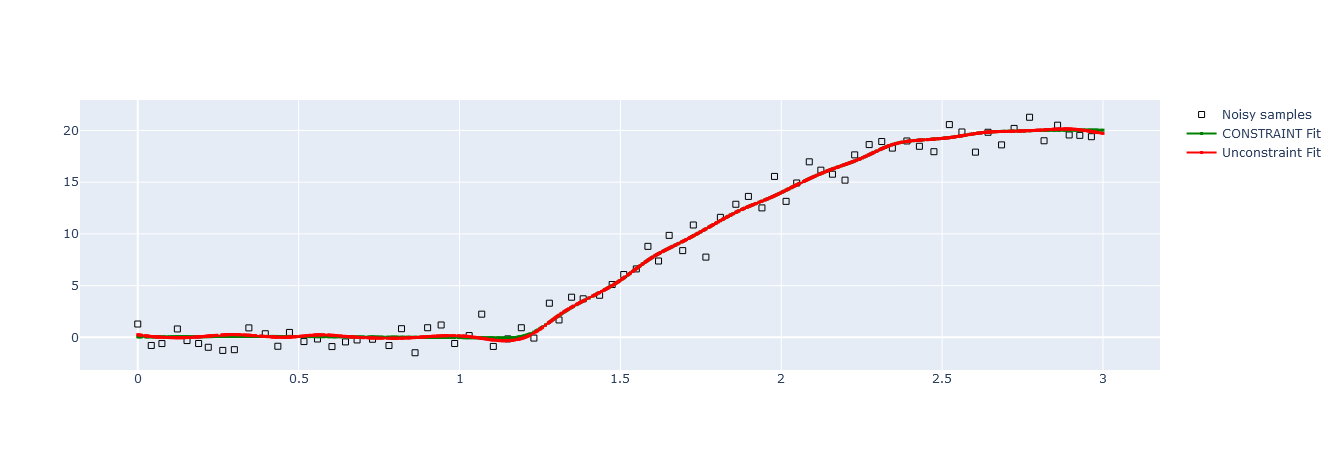

Best smoothing parameter for noise color pink found is {'smoothness': 0.3162, 'constraint': 316.2}
Smoothing Parameter low -> lam_c set to 6000!


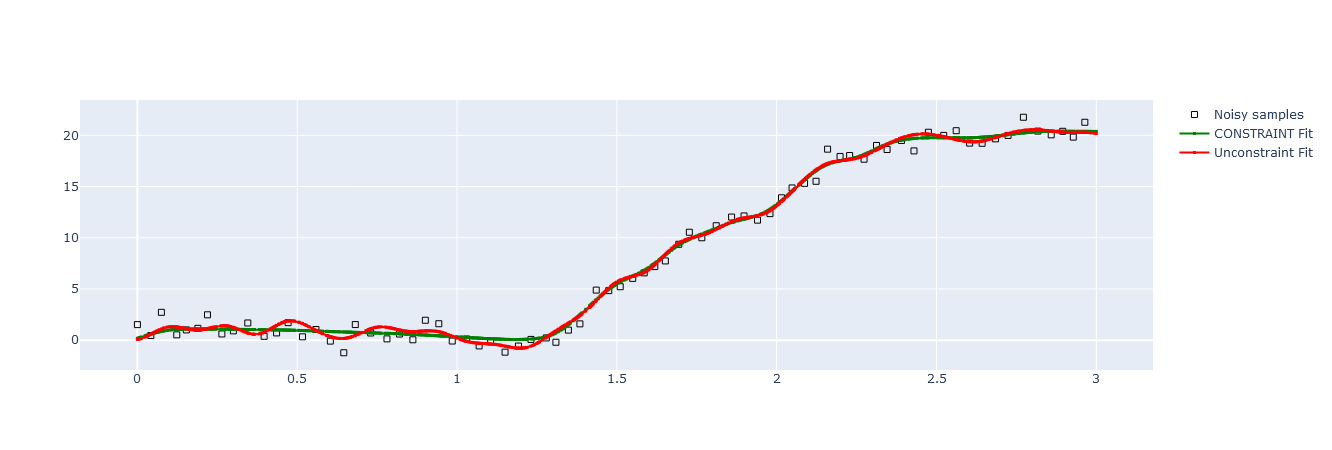

Best smoothing parameter for noise color brownian found is {'smoothness': 0.0056, 'constraint': 5.6}
Smoothing Parameter low -> lam_c set to 6000!


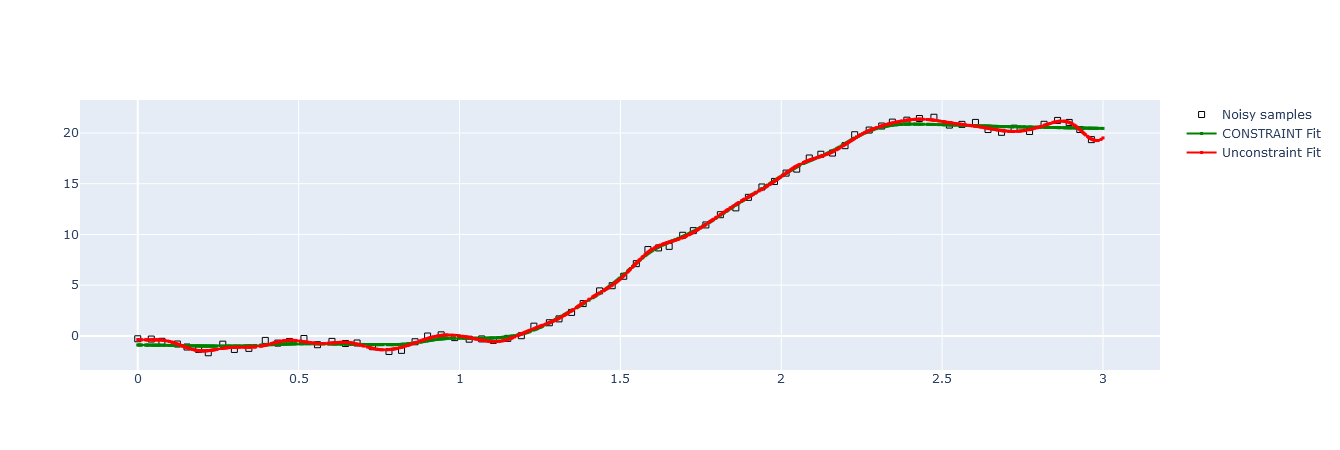

In [87]:
for color in ["white", "pink", "brownian"]:
# Unconstraint Model
    m_unc = (("s(1)", "none", 35, (1, 0), "equidistant"),)
    M_unc = StarModel(description=m_unc)
    M_unc.GCV_smoothingParameter(X=df_train["x"].values.reshape(-1,1), y=df_train["y_"+color], n_grid=25)
    best_lam_s = M_unc.smooths["s(1)"].lam["smoothness"]
    lam_c = 1000*best_lam_s
    print(f"Best smoothing parameter for noise color {color} found is {M_unc.smooths['s(1)'].lam}")
    yfit_unc = M_unc.basis @ M_unc.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["x"].values, k=M_unc.coef_list[-1])
    ypred_unc = B.basis @ M_unc.coef_

    # Constraint Model peak
    if best_lam_s < 6:
        best_lam_s = 6
        lam_c = 6000
        print("Smoothing Parameter low -> lam_c set to 6000!")
    m_con = (("s(1)", "inc", 35, (best_lam_s, lam_c), "equidistant"), )
    M_con = StarModel(description=m_con)

    M_con.fit(X=df_train["x"].values.reshape(-1,1), y=df_train["y_"+color], plot_=False)
    yfit_con = M_con.basis @ M_con.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["x"].values, k=M_con.coef_list[-1])
    ypred_con = B.basis @ M_con.coef_

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_train["x"][::10], y=df_train["y_"+color][::10], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))

    fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_con, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="CONSTRAINT Fit"))
    fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_unc, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
    fig.show()
    df_train["fit_unc_"+color] = yfit_unc
    df_train["fit_con_"+color] = yfit_con
    df_test["pred_unc_"+color] = ypred_unc
    df_test["pred_con_"+color] = ypred_con
    # fig.write_image("example_inc.png")

### **True function in die Plots oder nicht?**

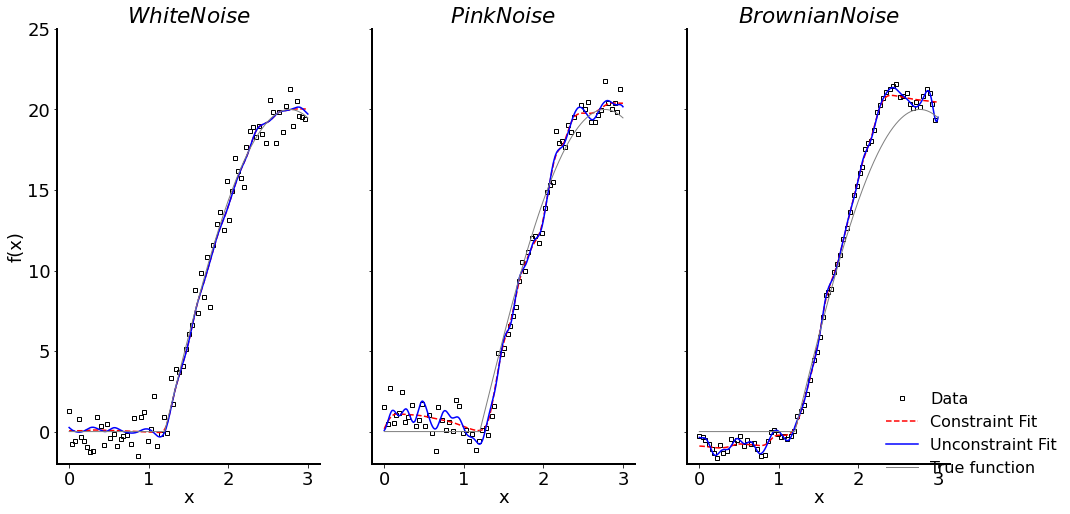

In [88]:
n_ = 10
# Create two subplots 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,8))
# Customized the left plot
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.plot(df_train["x"][::n_], df_train["y_white"][::n_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax1.plot(df_train["x"], df_train["fit_con_white"], color="red", label="Constraint Fit", linestyle="--")
ax1.plot(df_train["x"], df_train["fit_unc_white"], color="blue", label="Unconstraint Fit")
ax1.plot(df_train["x"], df_train["y"], color="grey", label="True function", linewidth=1)
ax1.set_title(r"$White Noise$")
ax1.set_ylabel("f(x)", labelpad=2)
ax1.set_xlabel("x", labelpad=0)
ax1.set_ylim(bottom=-2, top=25)

# Customized the middle plot
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

ax2.plot(df_train["x"][::n_], df_train["y_pink"][::n_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax2.plot(df_train["x"], df_train["fit_con_pink"], color="red", label="Constraint Fit", linestyle="--")
ax2.plot(df_train["x"], df_train["fit_unc_pink"], color="blue", label="Unconstraint Fit")
ax2.plot(df_train["x"], df_train["y"], color="grey", label="True function", linewidth=1)
ax2.set_title(r"$Pink Noise$")
ax2.set_xlabel("x", labelpad=0)
ax2.set_ylim(bottom=-2, top=25)

# Customized the left plot
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)

ax3.plot(df_train["x"][::n_], df_train["y_brownian"][::n_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax3.plot(df_train["x"], df_train["fit_con_brownian"], color="red", label="Constraint Fit", linestyle="--")
ax3.plot(df_train["x"], df_train["fit_unc_brownian"], color="blue", label="Unconstraint Fit")
ax3.plot(df_train["x"], df_train["y"], color="grey", label="True function", linewidth=1)
ax3.set_title(r"$Brownian Noise$")
ax3.set_xlabel("x", labelpad=0)
ax3.set_ylim(bottom=-2, top=25)

ax3.legend(bbox_to_anchor=(0.7, 0.2), loc="upper left", frameon=False, fontsize=16)
#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_noise_colors.png', transparent=False, bbox_inches='tight')

## **BULK vs. EQUIDISTANT DATA**

In [ ]:
from stareg.star_model import StarModel
from stareg.bspline import Bspline
from stareg.utils import check_constraint
import plotly.graph_objects as go
import numpy as np 
import pandas as pd
import os
from copy import deepcopy
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

from pyinputplus import inputChoice, inputMenu
from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from pylab import cm
%matplotlib inline

#mpl.rcParams["font.family"] = "sans-serif"
#mpl.rcParams["font.sans-serif"] = "Computer Modern Sans Serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["axes.linewidth"] = 2

colors = cm.get_cmap("tab10", 10)

## **Generate some Data**

In [16]:
n = int(inputMenu(choices=["250", "2500"], prompt="Choose the number of datapoints:\n", lettered=True))
experiment = inputMenu(choices=["l", "m", "r"], prompt="Choose the data distribution:\n",lettered=True)

Choose the number of datapoints:
A. 250
B. 2500


 2500


Choose the data distribution:
A. l
B. m
C. r


 l


Specify the random seed!
A. 1
B. 2


 1


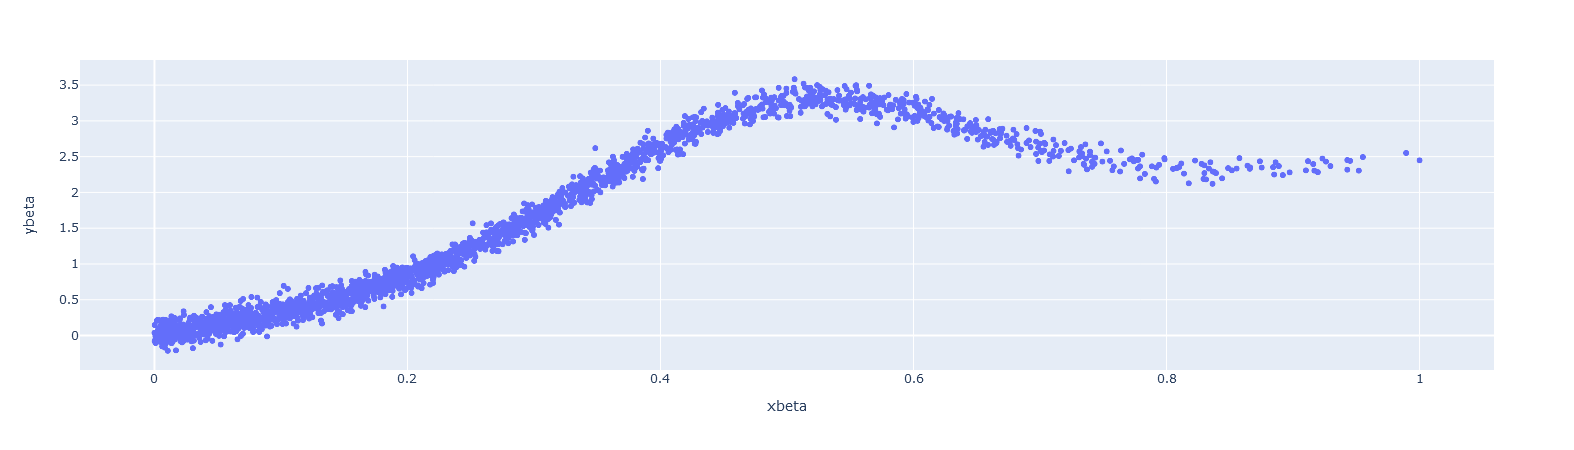

In [17]:
seed = int(inputMenu(choices=["1", "2"], prompt="Specify the random seed!\n", lettered=True))
np.random.seed(seed)

xlin = np.linspace(0,1,n)
xtrue = np.linspace(0,1,n)

if experiment=="l":
    beta_a, beta_b = 1, 3
elif experiment=="m":
    beta_a, beta_b = 3, 3
elif experiment=="r":
    beta_a, beta_b = 3, 1

xbeta = np.random.beta(a=beta_a, b=beta_b, size=n)
# normalized the beta distribution
xbeta = (xbeta - xbeta.min()) / (xbeta.max() - xbeta.min()) 
xbeta.sort()
noise = np.random.normal(loc=0.0, scale=0.1, size=n)

ytrue = 2*np.exp(-(xtrue-0.5)**2 / 0.05) + 2.5*xtrue
ytrue[np.argwhere(xtrue > 0.85)[0][0]:] = ytrue[np.argwhere(xtrue > 0.85)][0][0]

ylin = 2*np.exp(-(xlin-0.5)**2 / 0.05) + 2.5*xlin
ybeta = 2*np.exp(-(xbeta-0.5)**2 / 0.05) + 2.5*xbeta

df = pd.DataFrame(data=dict(xtrue=xtrue, xlin=xlin, xbeta=xbeta, ytrue=ytrue, ylin=ylin+noise, ybeta=ybeta+noise))
#px.scatter(df, x="xlin", y=["ytrue", "ylin"], width=10).show()
px.scatter(df, x="xbeta", y="ybeta", width=10).show()

In [20]:
# train-test split
cont = True
while cont:   
    df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)
    df_train = df_train.sort_index()
    df_test = df_test.sort_index()
    if df_train["xbeta"].values[0] == 0 and df_train["xbeta"].values[-1] == 1:
        cont = False

In [5]:
df_train.describe()

xtrue        xlin       xbeta       ytrue        ylin       ybeta
count  187.000000  187.000000  187.000000  187.000000  187.000000  187.000000
mean     0.492387    0.492387    0.303967    2.009202    2.021625    1.476043
std      0.289765    0.289765    0.239138    1.012022    1.021227    1.141527
min      0.000000    0.000000    0.000000    0.013476    0.004166   -0.066605
25%      0.242972    0.242972    0.104515    1.141093    1.144617    0.358882
50%      0.481928    0.481928    0.269007    2.297731    2.376471    1.331373
75%      0.740964    0.740964    0.417449    2.803856    2.810561    2.544776
max      1.000000    1.000000    1.000000    3.289268    3.367750    3.446773

## **Equidistant vs. Quantile Based for BETA-DISTRIBUTION DATA**

                             Beta distribution data                             
==============================Fit for equidistant===============================
Best smoothing parameter for equidistant is {'smoothness': 0.8697490026177834, 'constraint': 869.7490026177834}


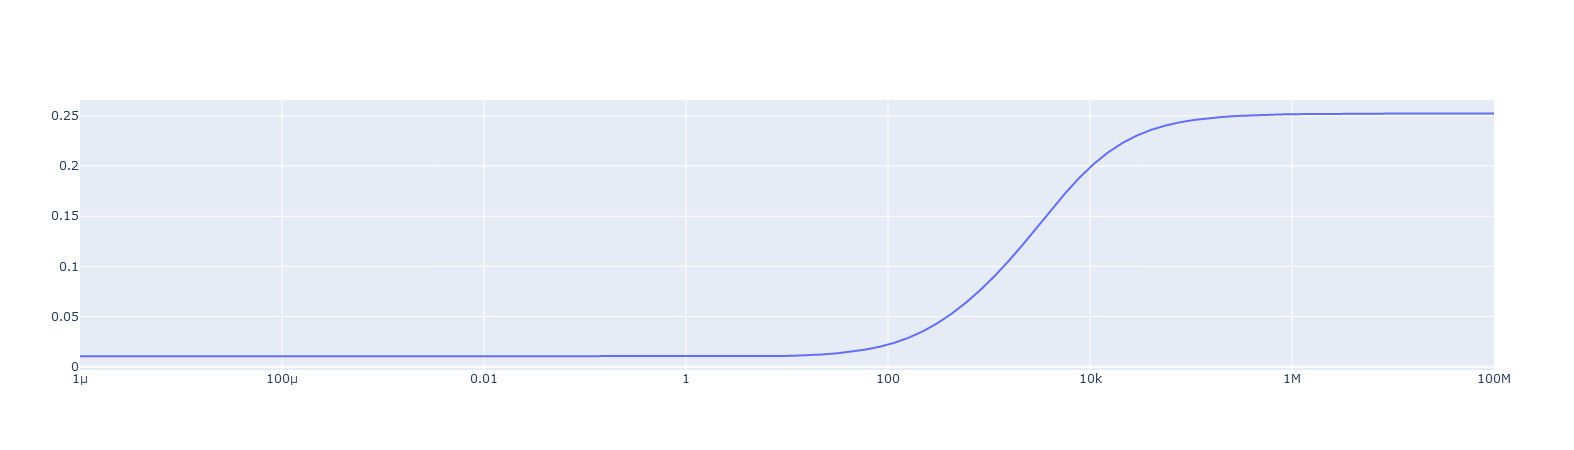

================================Fit for quantile================================
Best smoothing parameter for quantile is {'smoothness': 0.17073526474706888, 'constraint': 170.73526474706887}


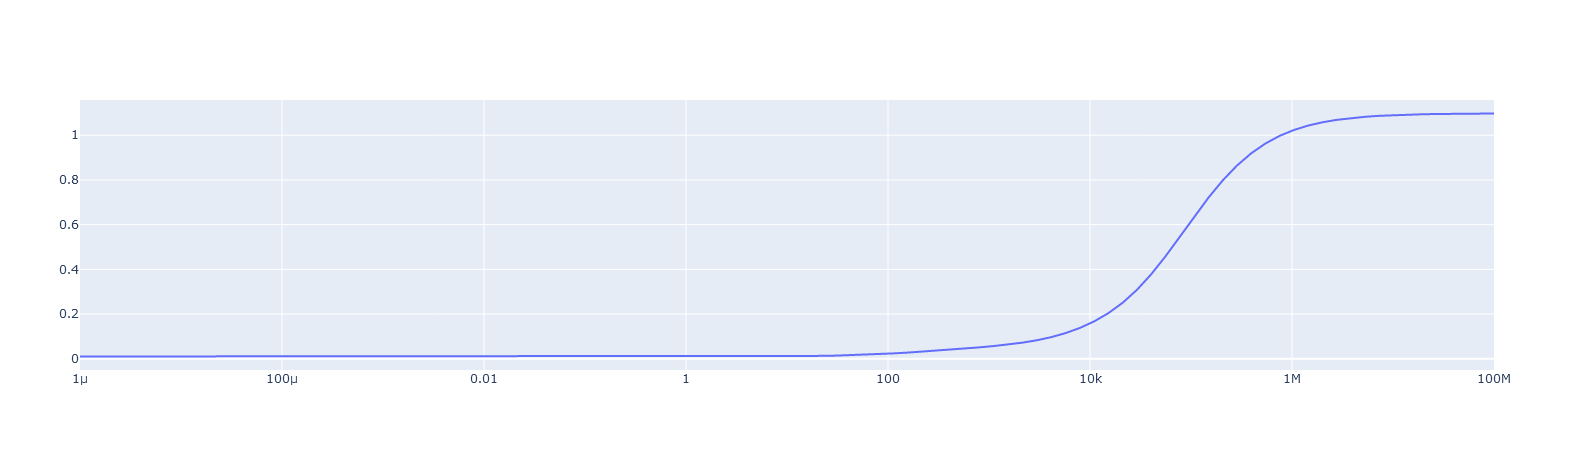



============================Equidistant knot Model: ============================ 
 {'s(1)': {'constraint': 'peak',
          'knot_type': 'equidistant',
          'lam': {'constraint': 869.7490026177834,
                  'smoothness': 0.8697490026177834},
          'n_param': 35}}
=============================Quantile knot Model: ============================== 
 {'s(1)': {'constraint': 'peak',
          'knot_type': 'quantile',
          'lam': {'constraint': 170.73526474706887,
                  'smoothness': 0.17073526474706888},
          'n_param': 35}}


In [40]:
n_param = 35
Models_unc_beta = []
Models_con_beta = []
print("".ljust(80, "="))
print("Beta distribution data".center(80, " "))
print("".ljust(80, "="))
for grid in ["equidistant", "quantile"]:
    print(f"Fit for {grid}".center(80, "="))
    m_unc_beta = (("s(1)", "none", n_param, (1, 0), grid),)
    M_unc_beta = StarModel(description=m_unc_beta)
    M_unc_beta.GCV_smoothingParameter(X=df_train["xbeta"].values.reshape(-1,1), y=df_train["ybeta"], n_grid=100, p_min=1e-6, p_max=1e8)
    
    best_lam_s_beta = M_unc_beta.smooths["s(1)"].lam["smoothness"]
    print(f"Best smoothing parameter for {grid} is {M_unc_beta.smooths['s(1)'].lam}")
    M_unc_beta.plot_GCV_curve()
    yfit_unc_beta = M_unc_beta.basis @ M_unc_beta.coef_
    
    B = Bspline()
    B.bspline_basis(x_data=df_test["xbeta"].values, k=M_unc_beta.coef_list[-1])
    ypred_unc = B.basis @ M_unc_beta.coef_

    
    #if best_lam_s_beta < 0.18:
    #    #best_lam_s_beta = 6
    #    best_lam_s_beta *= 10
    #    print("Smoothing Parameter low/high -> change something!")
    lam_c_beta = 1000*best_lam_s_beta
    
        
    # Constraint optimized Model 
    #########################################
    m_con_beta = (("s(1)", "peak", n_param, (best_lam_s_beta, lam_c_beta), grid), )
    M_con_beta = StarModel(description=m_con_beta)
    #########################################
    M_con_beta.fit(X=df_train["xbeta"].values.reshape(-1,1), y=df_train["ybeta"], plot_=False)
    yfit_con_beta = M_con_beta.basis @ M_con_beta.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["xbeta"].values, k=M_con_beta.coef_list[-1])
    ypred_con_beta = B.basis @ M_con_beta.coef_
    
    df_train["fit_unc_beta_"+grid] = yfit_unc_beta
    df_train["fit_con_beta_"+grid] = yfit_con_beta
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train["xbeta"], y=df_train["ybeta"], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))
    fig.add_trace(go.Scatter(x=df_train["xbeta"], y=yfit_con_beta, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="CONSTRAINT Fit"))
    fig.add_trace(go.Scatter(x=df_train["xbeta"], y=yfit_unc_beta, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
    for i in range(M_con_beta.basis.shape[1]):
        fig.add_trace(go.Scatter(x=df_train["xbeta"], y=M_con_beta.basis[:,i] * M_con_beta.coef_[i], mode="lines", line=dict(color="grey", width=1), name=None))
    #fig.show()
    Models_unc_beta.append(M_unc_beta)
    Models_con_beta.append(M_con_beta)
    

print("\n")
print("Equidistant knot Model: ".center(80, "="), "\n", Models_con_beta[0])
print("Quantile knot Model: ".center(80, "="), "\n", Models_con_beta[1])

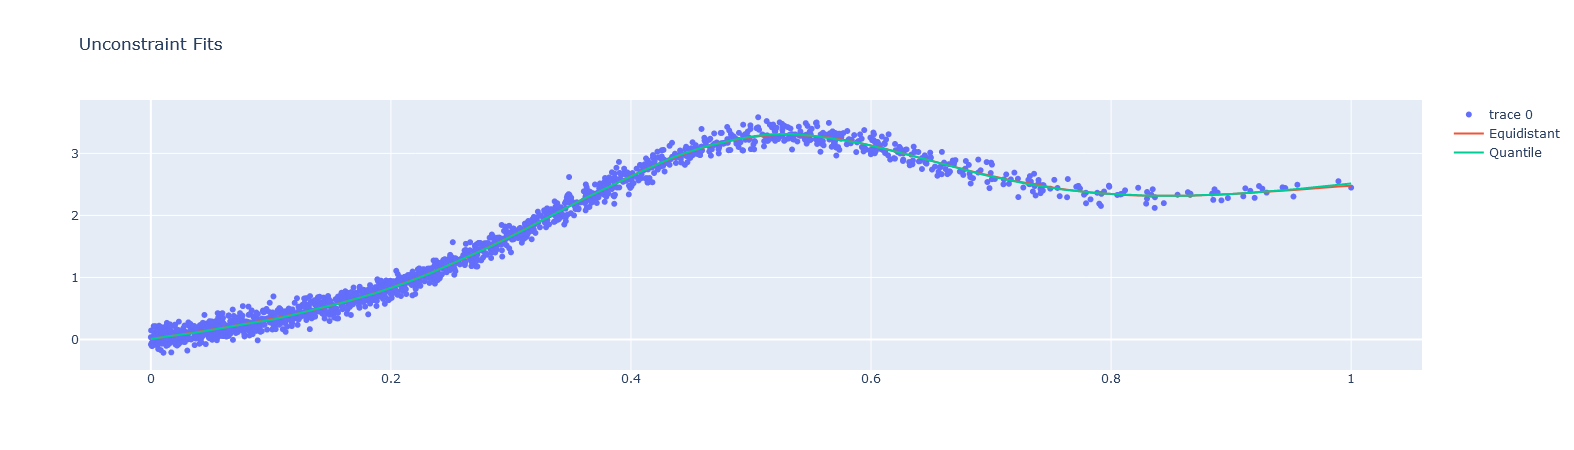

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=df_train["ybeta"], mode="markers"))
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=Models_unc_beta[0].basis @ Models_unc_beta[0].coef_, name="Equidistant"))
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=Models_unc_beta[1].basis @ Models_unc_beta[1].coef_, name="Quantile"))
fig.update_layout(title="Unconstraint Fits")

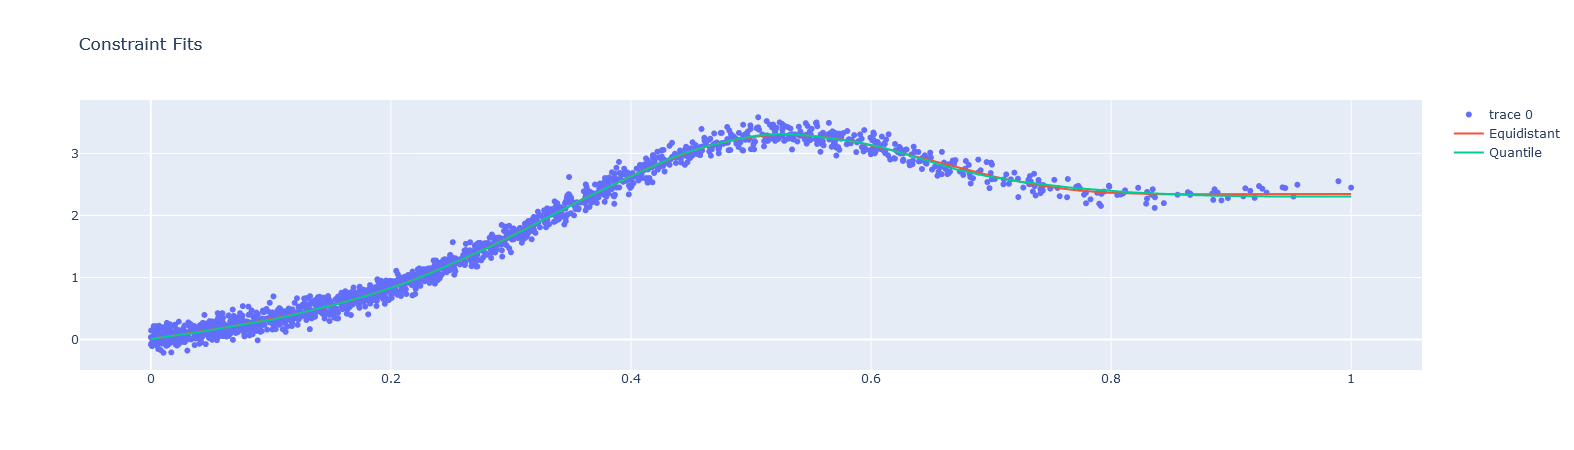

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=df_train["ybeta"], mode="markers"))
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=Models_con_beta[0].basis @ Models_con_beta[0].coef_, name="Equidistant"))
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=Models_con_beta[1].basis @ Models_con_beta[1].coef_, name="Quantile"))
fig.update_layout(title="Constraint Fits")

### **Block for plots including the violated constraints for fitted values and coefficients** for Skewed data

Left Skewed Data Distribution


C:\Users\jakob\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:115: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



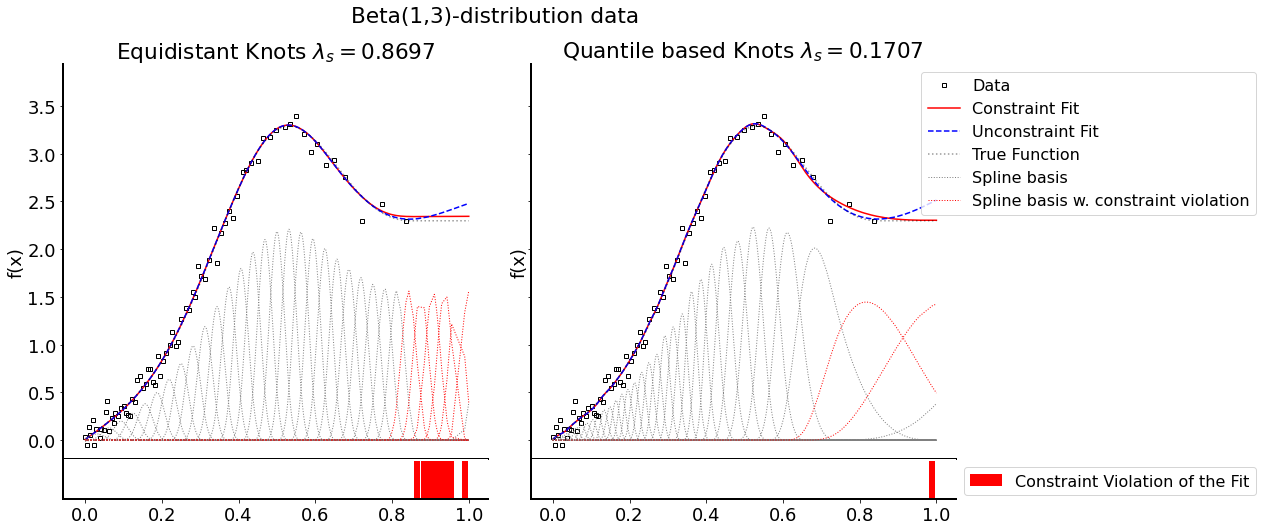

In [43]:
cfit_equidistant = np.diag(check_constraint(df_train["fit_con_beta_equidistant"],
                                            constraint="peak",
                                            smooth_type=type(Models_con_beta[0].smooths["s(1)"])))

cfit_quantile = np.diag(check_constraint(df_train["fit_con_beta_quantile"], 
                                         constraint="peak", 
                                         smooth_type=type(Models_con_beta[1].smooths["s(1)"])))

ccoef_equidistant = list(
    np.diag(check_constraint(Models_con_beta[0].coef_, 
                             constraint="peak", 
                             smooth_type=type(Models_con_beta[0].smooths["s(1)"])))) + [0]
ccoef_quantile = list(
    np.diag(v=check_constraint(Models_con_beta[1].coef_, 
                               constraint="peak", 
                               smooth_type=type(Models_con_beta[1].smooths["s(1)"])))) + [0]

##########################################################################
##########################################################################
## PLOT
##########################################################################
##########################################################################

f, axs = plt.subplots(2, 2, sharey="row", sharex="col", figsize=(16,8),
                      gridspec_kw={"hspace": 0, "wspace":0.1, "width_ratios":[1,1], 
                                   "height_ratios":[1,0.1]})
((ax11, ax12), (ax21, ax22)) = axs

# remove the splines from all subwindows
for ax in axs.ravel():
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
# remove the tick labels for the constraint violation plot
ax21.yaxis.set_ticks([])
##########################################################################
##########################################################################
## plot the data
##########################################################################
##########################################################################
np_ = 2 if n==250 else 25
ax11.plot(df_train["xbeta"][::np_], df_train["ybeta"][::np_], color="black", label="Data", 
          marker="s", markersize=4, 
          markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax11.plot(df_train["xbeta"], df_train["fit_con_beta_equidistant"], color="red", label="Constraint Fit")
ax11.plot(df_train["xbeta"], df_train["fit_unc_beta_equidistant"], color="blue", label="Unconstraint Fit", 
          linestyle="--")
ax11.plot(df_train["xtrue"], df_train["ytrue"], color="black", linestyle=":",alpha=0.4, label="True Function")
ax11.set_title(r"Equidistant Knots $\lambda_s ={}$".format(round(Models_con_beta[0].smooths["s(1)"].lam["smoothness"], 4)))
ax11.set_ylabel("f(x)", labelpad=2)
ax11.set_xlabel("x", labelpad=0)
ax11.set_ylim(bottom=-0.2, top=df_train["ybeta"].max()*1.1)
# plot basis functions
for i in range(Models_con_beta[0].basis.shape[1]):
    if ccoef_equidistant[i]:
        ax11.plot(df_train["xbeta"], Models_con_beta[0].basis[:,i]*Models_con_beta[0].coef_[i], 
                  color="red", linewidth=1, linestyle=":")
    else:
        ax11.plot(df_train["xbeta"], Models_con_beta[0].basis[:,i]*Models_con_beta[0].coef_[i], 
                  color="grey", linewidth=1, linestyle=":")

# plot quantile based fit
ax12.spines["right"].set_visible(False)
ax12.spines["top"].set_visible(False)

ax12.plot(df_train["xbeta"][::np_], df_train["ybeta"][::np_], color="black", label="Data", 
          marker="s", markersize=4, 
          markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax12.plot(df_train["xbeta"], df_train["fit_con_beta_quantile"], color="red", label="Constraint Fit")
ax12.plot(df_train["xbeta"], df_train["fit_unc_beta_quantile"], color="blue", label="Unconstraint Fit", 
          linestyle="--")
ax12.plot(df_train["xtrue"], df_train["ytrue"], color="black", linestyle=":",alpha=0.4, label="True Function")
ax12.set_title(r"Quantile based Knots $\lambda_s = {}$".format(round(Models_con_beta[1].smooths["s(1)"].lam["smoothness"], 4)))
ax12.set_ylabel("f(x)", labelpad=2)
ax12.set_xlabel("x", labelpad=0)
ax12.set_ylim(bottom=-0.2, top=df_train["ybeta"].max()*1.1)
for i in range(Models_con_beta[1].basis.shape[1]):
    if ccoef_quantile[i]:
        ax12.plot(df_train["xbeta"], Models_con_beta[1].basis[:,i]*Models_con_beta[1].coef_[i], 
                  color="red", linewidth=1, linestyle=":")
    else:
        ax12.plot(df_train["xbeta"], Models_con_beta[1].basis[:,i]*Models_con_beta[1].coef_[i], 
                  color="grey", linewidth=1, linestyle=":")
ax12.plot(0, 0, color="grey", linewidth=1, linestyle=":", label="Spline basis")
ax12.plot(0, 0, color="red", linewidth=1, linestyle=":", label="Spline basis w. constraint violation")

ax12.legend(bbox_to_anchor=(0.9, 1.), loc="upper left", frameon=True, fontsize=16, )

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_left_skewed_data_seed_{}.png'.format(seed), transparent=False, bbox_inches='tight')
##########################################################################
##########################################################################
## plot the constraint violation for fit
##########################################################################
##########################################################################
ax21.bar(x=df_train["xbeta"].values[:-1], color="red", 
         height=cfit_equidistant, width=0.015)
ax22.bar(x=df_train["xbeta"].values[:-1], color="red", 
         height=cfit_quantile, width=0.015, label="Constraint Violation of the Fit")
ax22.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=True, fontsize=16)

plt.suptitle(r"Beta({},{})-distribution data".format(beta_a, beta_b))

path = "..\\..\\Thesis_WorkingDirectory\\thesisplots\\"
if experiment=="l":
    fname = "exp_left_skewed_data_ndata_{}_rseed_{}".format(n, seed)
    print("Left Skewed Data Distribution")
elif experiment=="m":
    fname = "exp_middle_skewed_data_ndata_{}_rseed_{}".format(n, seed)
    print("Middle Skewed Data Distribution")
elif experiment=="r":
    fname = "exp_right_skewed_data_ndata_{}_rseed_{}".format(n, seed)
    print("Right Skewed Data Distribution")

#plt.savefig(path+"exp_beta\\"+fname+".png", transparent=False, bbox_inches='tight')

f.show()

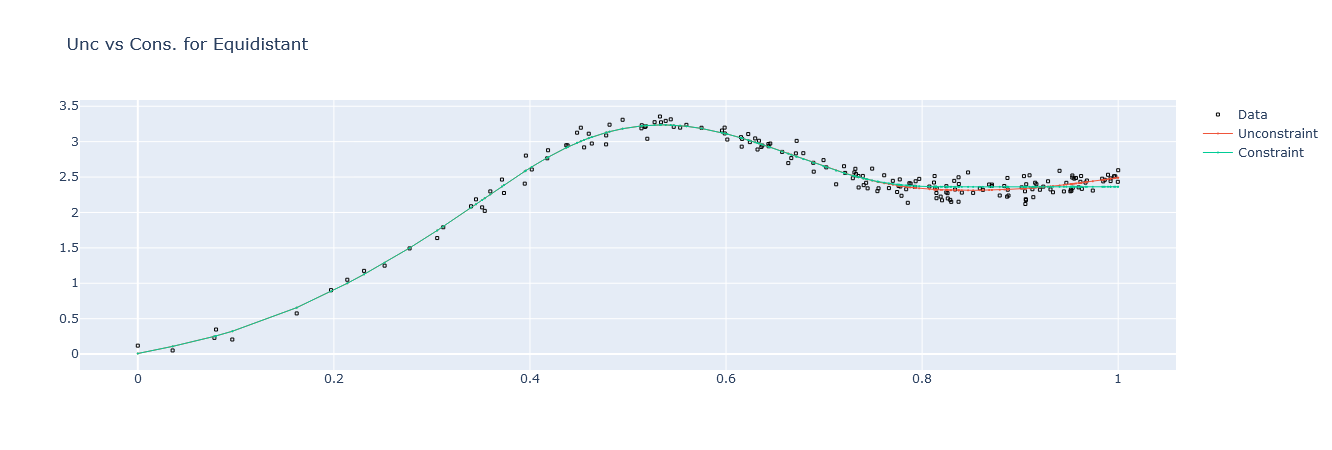

In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=df_train["ybeta"], mode="markers", 
                         marker=dict(size=3, symbol=101, color="black"), name="Data"))
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=df_train["fit_unc_beta_equidistant"], mode="markers+lines", 
                         line=dict(width=1), marker=dict(size=2), name="Unconstraint"))
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=df_train["fit_con_beta_equidistant"], mode="markers+lines", 
                         line=dict(width=1), marker=dict(size=2), name="Constraint"))
fig.update_layout(title="Unc vs Cons. for Equidistant")


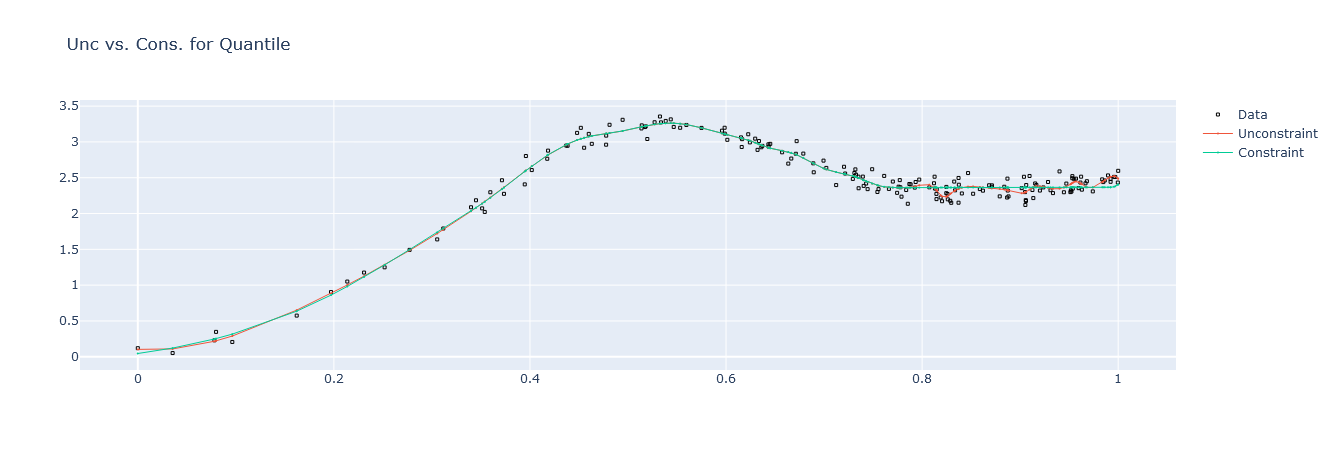

In [48]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=df_train["ybeta"], mode="markers", 
                         marker=dict(size=3, symbol=101, color="black"), name="Data"))
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=df_train["fit_unc_beta_quantile"], mode="markers+lines", 
                         line=dict(width=1), marker=dict(size=2), name="Unconstraint"))
fig.add_trace(go.Scatter(x=df_train["xbeta"], y=df_train["fit_con_beta_quantile"], mode="markers+lines", 
                         line=dict(width=1), marker=dict(size=2), name="Constraint"))
fig.update_layout(title="Unc vs. Cons. for Quantile")


#### **Hat Matrices**

In [53]:
H_equi = Models_con_beta[0].calc_hat_matrix()
H_quant = Models_con_beta[1].calc_hat_matrix()

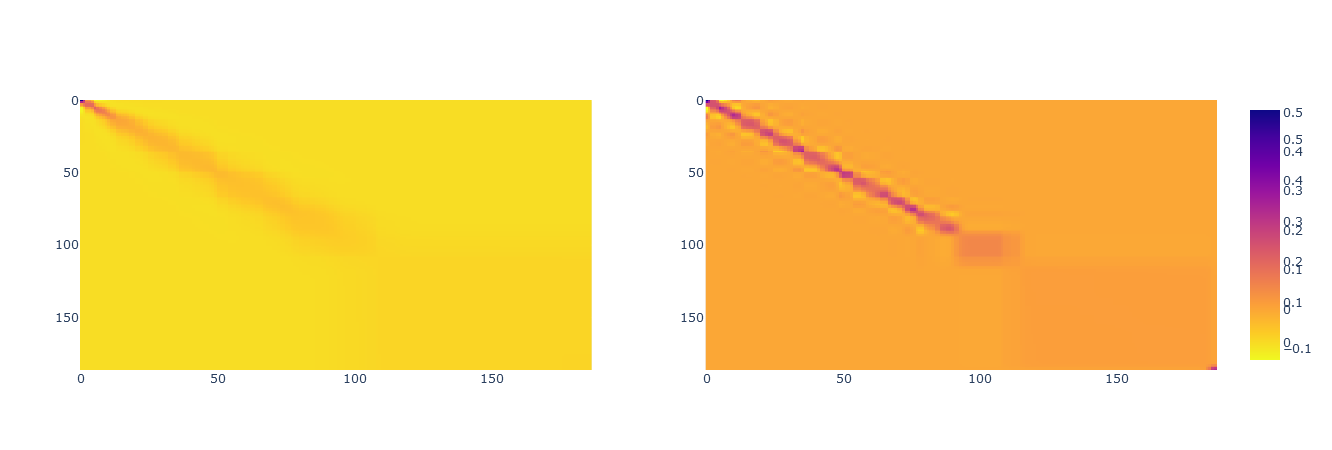

In [76]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Heatmap(z=H_equi, reversescale=True, name="Equidistant"), row=1, col=1)
fig.add_trace(go.Heatmap(z=H_quant, reversescale=True, name="Quantile Based"), row=1, col=2)
fig.update_layout(yaxis=dict(autorange="reversed"), yaxis2=dict(autorange="reversed"))

Eff Nr. of Parameters =  7.877184502957017


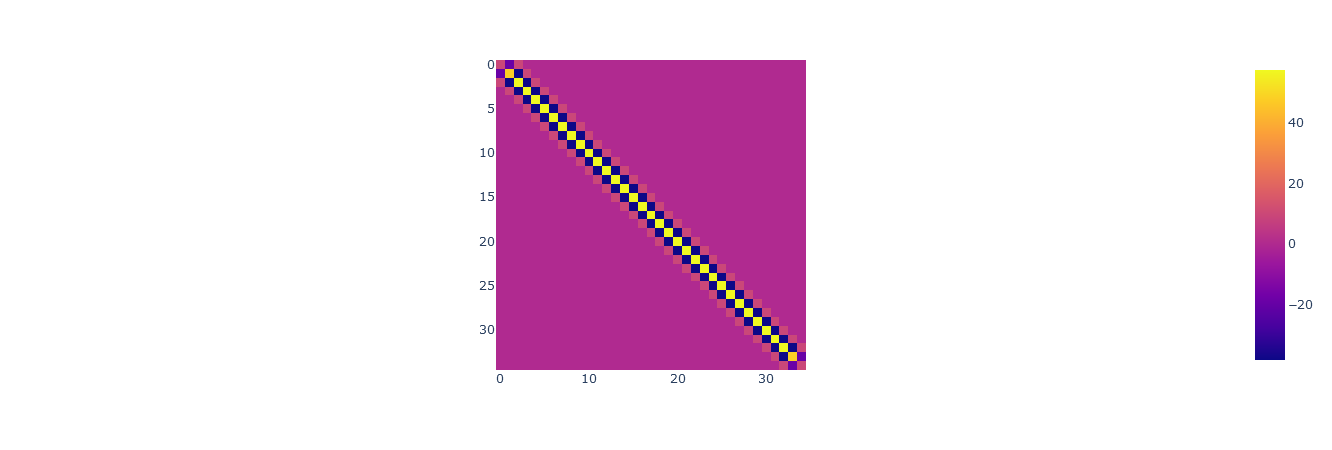

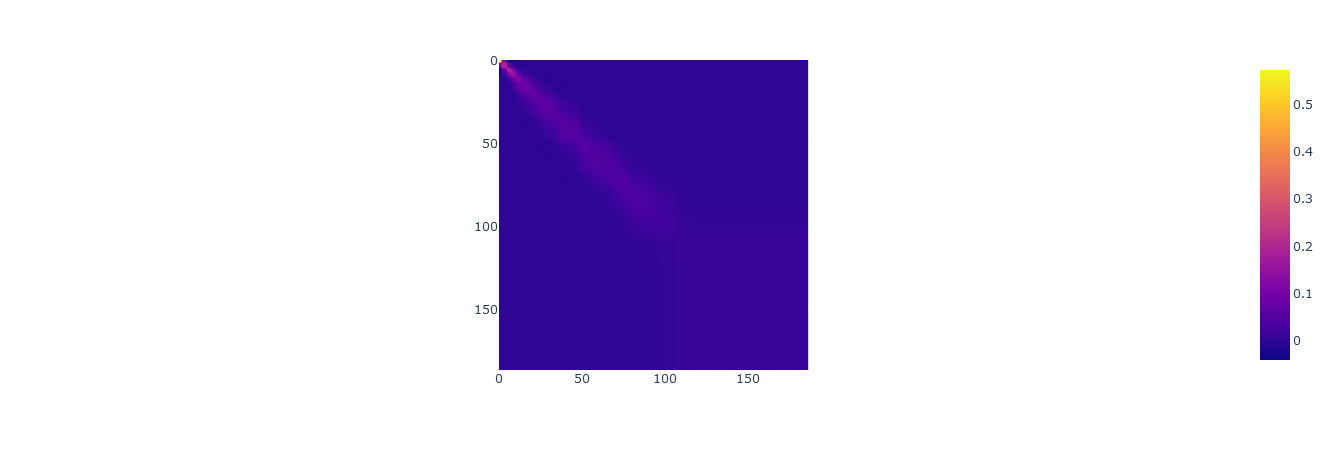

In [51]:
print("Eff Nr. of Parameters = ", np.trace(H_equi))
px.imshow(Models_con_beta[0].smoothness_penalty_matrix).show()
px.imshow(H_equi).show()


Eff Nr. of Parameters =  17.77578474145791


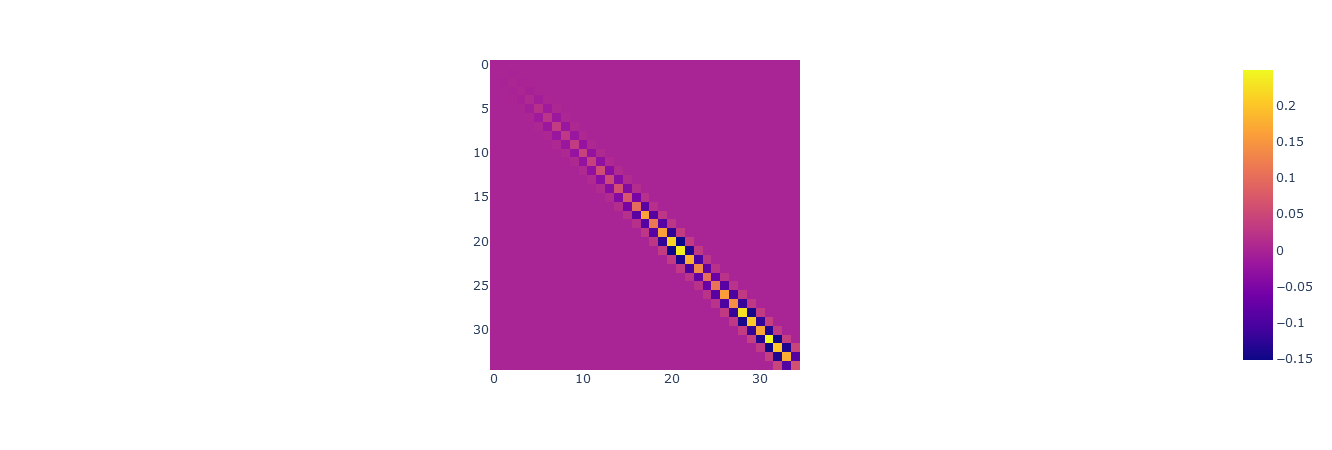

In [52]:
print("Eff Nr. of Parameters = ", np.trace(H_quant))
px.imshow(Models_con_beta[1].smoothness_penalty_matrix)

### **Equidistant vs Quantile Based for LINEAR SPACED DATA**

In [44]:
n_param = 35
Models_lin = []
print("Linear space data")
for grid in ["equidistant", "quantile"]:
    m_unc_linsp = (("s(1)", "none", n_param, (1, 0), grid),)
    M_unc_linsp = StarModel(description=m_unc_linsp)
    M_unc_linsp.GCV_smoothingParameter(X=df_train["xlin"].values.reshape(-1,1), y=df_train["ylin"], n_grid=25)
    best_lam_s_linsp = M_unc_linsp.smooths["s(1)"].lam["smoothness"]
    lam_c_linsp = 1000*best_lam_s_linsp
    print(f"Best smoothing parameter for {grid} is {M_unc_linsp.smooths['s(1)'].lam}")
    
    M_unc_linsp = StarModel(description=(("s(1)", "none", n_param, (best_lam_s_linsp, 0), grid),))
    M_unc_linsp.fit(X=df_train["xlin"].values.reshape(-1,1), y=df_train["ylin"],plot_=False)
    yfit_unc_linsp = M_unc_linsp.basis @ M_unc_linsp.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["xlin"].values, k=M_unc_linsp.coef_list[-1])
    ypred_unc = B.basis @ M_unc_linsp.coef_

    if best_lam_s_linsp < 6:
        #best_lam_s_linsp = 6
        lam_c_linsp = 6000
        print("Smoothing Parameter low -> lam_c set to 6000!")

    # Constraint Model peak
    m_con_linsp = (("s(1)", "peak", 35, (best_lam_s_linsp, lam_c_linsp), grid), )
    M_con_linsp = StarModel(description=m_con_linsp)

    M_con_linsp.fit(X=df_train["xlin"].values.reshape(-1,1), y=df_train["ylin"], plot_=False)
    yfit_con_linsp = M_con_linsp.basis @ M_con_linsp.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["xlin"].values, k=M_con_linsp.coef_list[-1])
    ypred_con_linsp = B.basis @ M_con_linsp.coef_
    
    df_train["fit_unc_linspace_"+grid] = yfit_unc_linsp
    df_train["fit_con_linspace_"+grid] = yfit_con_linsp
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train["xlin"], y=df_train["ylin"], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))
    fig.add_trace(go.Scatter(x=df_train["xlin"], y=yfit_con_linsp, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="CONSTRAINT Fit"))
    fig.add_trace(go.Scatter(x=df_train["xlin"], y=yfit_unc_linsp, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
    for i in range(M_con_linsp.basis.shape[1]):
        fig.add_trace(go.Scatter(x=df_train["xlin"], y=M_con_linsp.basis[:,i] * M_con_linsp.coef_[i], mode="lines", line=dict(color="grey", width=1), name=None))
    #fig.show()
    
    Models_lin.append(M_con_linsp)

    
print("Equidistant knot Model: ".center(50, "-"), "\n", Models_lin[0])
print("Quantile knot Model: ".center(50, "-"), "\n", Models_lin[1])

In [44]:
np_ = 1
# Create two subplots 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,8))

# plot linear based fit
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.plot(df_train["xlin"][::np_], df_train["ylin"][::np_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax1.plot(df_train["xlin"], df_train["fit_con_linspace_equidistant"], color="red", label="Constraint Fit", linestyle="--")
ax1.plot(df_train["xlin"], df_train["fit_unc_linspace_equidistant"], color="blue", label="Unconstraint Fit")
ax1.set_title(r"Equidistant Knots")
ax1.set_ylabel("f(x)", labelpad=2)
ax1.set_xlabel("x", labelpad=0)
ax1.set_ylim(bottom=-0.2, top=3.5)
# plot basis functions
for i in range(Models_lin[0].basis.shape[1]):
    ax1.plot(df_train["xlin"], Models_lin[0].basis[:,i]*Models_lin[0].coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax1.plot(df_train["xlin"], Models_lin[0].basis[:,i]*Models_lin[0].coef_[i], color="grey", linewidth=1, label="Spline basis")
    
# plot quantile based fit
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

ax2.plot(df_train["xlin"][::np_], df_train["ylin"][::np_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax2.plot(df_train["xlin"], df_train["fit_con_linspace_quantile"], color="red", label="Constraint Fit", linestyle="--")
ax2.plot(df_train["xlin"], df_train["fit_unc_linspace_quantile"], color="blue", label="Unconstraint Fit")
ax2.set_title(r"Quantile based Knots")
ax2.set_ylabel("f(x)", labelpad=2)
ax2.set_xlabel("x", labelpad=0)
ax2.set_ylim(bottom=-0.2, top=3.5)
for i in range(Models_lin[1].basis.shape[1]):
    ax2.plot(df_train["xlin"], Models_lin[1].basis[:,i]*Models_lin[1].coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax2.plot(df_train["xlin"], Models_lin[1].basis[:,i]*Models_lin[1].coef_[i], color="grey", linewidth=1, label="Spline basis")

ax2.legend(bbox_to_anchor=(0.8, 1.1), loc="upper left", frameon=False, fontsize=16)

plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_linspace_Data.png', transparent=False, bbox_inches='tight')

## **Ebner Data**


In [1]:
from stareg.star_model import StarModel
from stareg.bspline import Bspline
from stareg.utils import check_constraint
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import numpy as np 
import pandas as pd
import os
from copy import deepcopy

from pyinputplus import inputChoice, inputMenu
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from pylab import cm
%matplotlib inline

#mpl.rcParams["font.family"] = "sans-serif"
#mpl.rcParams["font.sans-serif"] = "Computer Modern Sans Serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["axes.linewidth"] = 2

colors = cm.get_cmap("tab10", 10)

# **Get data, normalize and train-test split**

In [2]:
np.random.seed(1)

path = "..\\..\\Data\\"
df = pd.read_csv(filepath_or_buffer=path+"Table_alpha_Data.txt")
df.columns = ["QDot", "T", "HTC"]

df_gridded = pd.read_csv(filepath_or_buffer=path+"Table_alpha_Data_gridded.txt")
df_gridded.columns = ["QDot", "T", "HTC"]

X, y = df[["QDot", "T"]].values, df["HTC"].values
Xgridded, ygridded = df_gridded[["QDot", "T"]].values, df_gridded["HTC"].values

In [3]:
dtype = inputMenu(["gridded", ""], "Which dataset?\n", lettered=True)

if dtype == "gridded":
    X = Xgridded
    y = ygridded
else:
    X = X
    y = y
    
# normalized data
Xmin, Xmax = X.min(axis=0), X.max(axis=0)
Xnorm = (X - Xmin) / (Xmax - Xmin)

cont = True
while cont:
    Xtrain, Xtest, ytrain, ytest = train_test_split(Xnorm, y, test_size=0.1)
    if np.all(Xtrain.min()) == 0 and np.all(Xtrain.max()) == 1:
        cont = False
    

Which dataset?
A. gridded
B. 


In [75]:
def plot_data_hist2d(X, n_bins=10, fname=False):
    fig, ax = plt.subplots(figsize =(10,7))
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    hist, xbins, ybins, _ = ax.hist2d(X[:,0],X[:,1], bins=(nbins,nbins), cmap="OrRd")
    dx = np.diff(xbins).mean()
    dy = np.diff(ybins).mean()
    print("".ljust(50, "="))
    print("dm = ", dx)
    print("dT = ", dy)
    print("".ljust(50, "="))
    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax.text(xbins[j]+dx/2,ybins[i]+dy/2, int(hist.T[i,j]), color="k", ha="center", va="center", fontweight="bold")

    ax.set_xlabel(r'$\dot{m}$ [kg/s]', labelpad=1)  
    ax.set_ylabel(r'T[K]', rotation=0, labelpad=24)
    ax.set_xlim(left=X[:,0].min(), right=X[:,0].max())
    ax.set_ylim(bottom=X[:,1].min(), top=X[:,1].max())

    if fname:
        path = '..\\..\\Thesis_WorkingDirectory\\thesisplots\\Ebner\\'
        print(f"Save Figure to {path+fname}")
        plt.savefig(path+fname, transparent=False, bbox_inches='tight')


dm =  0.9671718647654984
dT =  49.7023
Save Figure to ..\..\Thesis_WorkingDirectory\thesisplots\Ebner\data_distribution.png


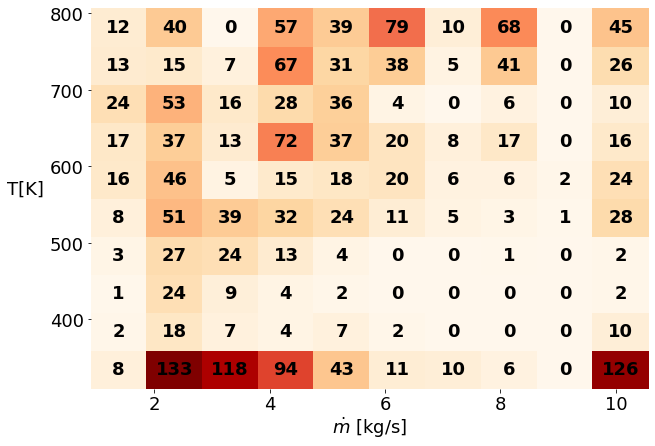

In [76]:
# Plot histogram of data
plot_data_hist2d(X=X, n_bins=10, fname="data_distribution.png")

In [83]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [84]:
Xtrain_1_unique = np.unique(Xtrain[:,0], return_index=True)
Xtrain_2_unique = np.unique(Xtrain[:,1], return_index=True)

In [85]:
df1 = pd.DataFrame(data=dict(X1=Xtrain_1_unique[0], y1=ytrain[Xtrain_1_unique[1]]))
df2 = pd.DataFrame(data=dict(X2=Xtrain_2_unique[0], y2=ytrain[Xtrain_2_unique[1]]))

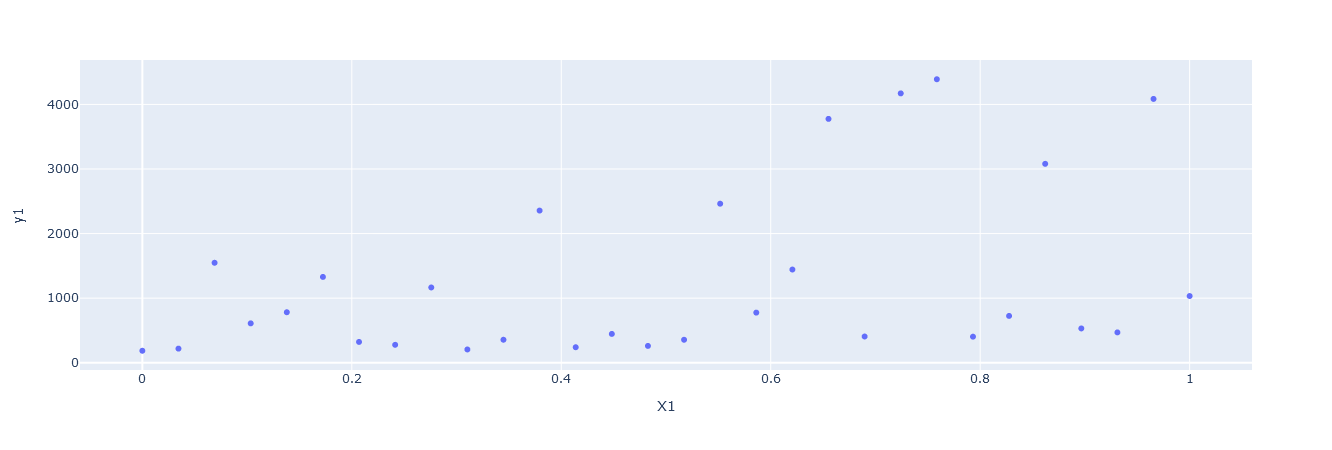

In [86]:
px.scatter(df1, x="X1", y="y1")

In [94]:
model_lowess_d1 = lowess(exog=df1["X1"], endog=df1["y1"], frac=0.1, it=5)
model_lowess_d2 = lowess(exog=df2["X2"], endog=df2["y2"], frac=0.1, it=5)

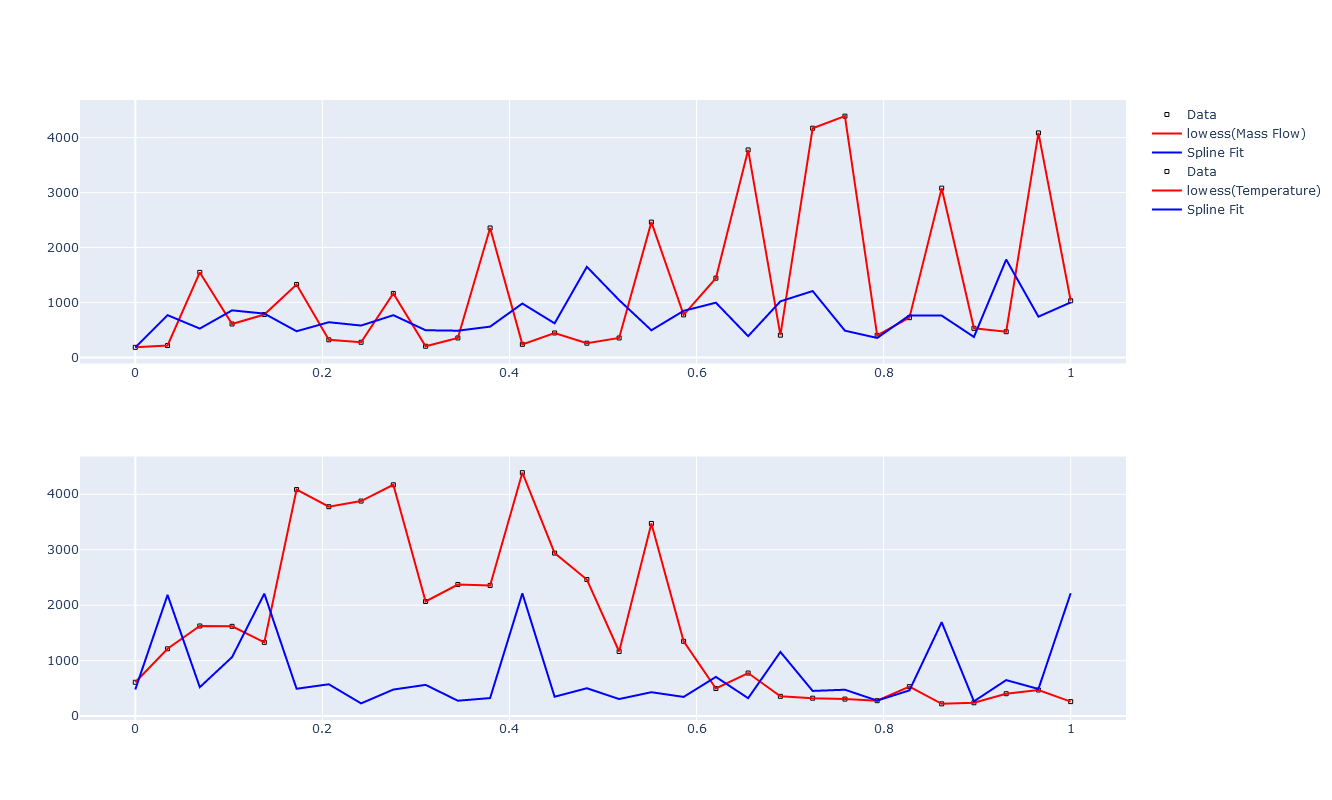

In [95]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x=df1["X1"], y=df1["y1"], mode="markers", marker=dict(size=4, symbol=101, color="black"), name="Data"), row=1, col=1)
fig.add_trace(go.Scatter(x=model_lowess_d1[:,0], y=model_lowess_d1[:,1], mode="lines", line=dict(width=2, color="red"), name="lowess(Mass Flow)"), row=1, col=1)
fig.add_trace(go.Scatter(x=model_lowess_d1[:,0], y=M1.basis@M1.coef_, name="Spline Fit", mode="lines", line=dict(width=2, color="blue")), row=1, col=1)

fig.add_trace(go.Scatter(x=df2["X2"], y=df2["y2"], mode="markers", marker=dict(size=4, symbol=101, color="black"), name="Data"), row=2, col=1)
fig.add_trace(go.Scatter(x=model_lowess_d2[:,0], y=model_lowess_d2[:,1], mode="lines", line=dict(width=2, color="red"), name="lowess(Temperature)"), row=2, col=1)
fig.add_trace(go.Scatter(x=model_lowess_d2[:,0], y=M2.basis@M2.coef_, name="Spline Fit", mode="lines", line=dict(width=2, color="blue")), row=2, col=1)


fig.update_layout(autosize=False, width=800, height=800,)

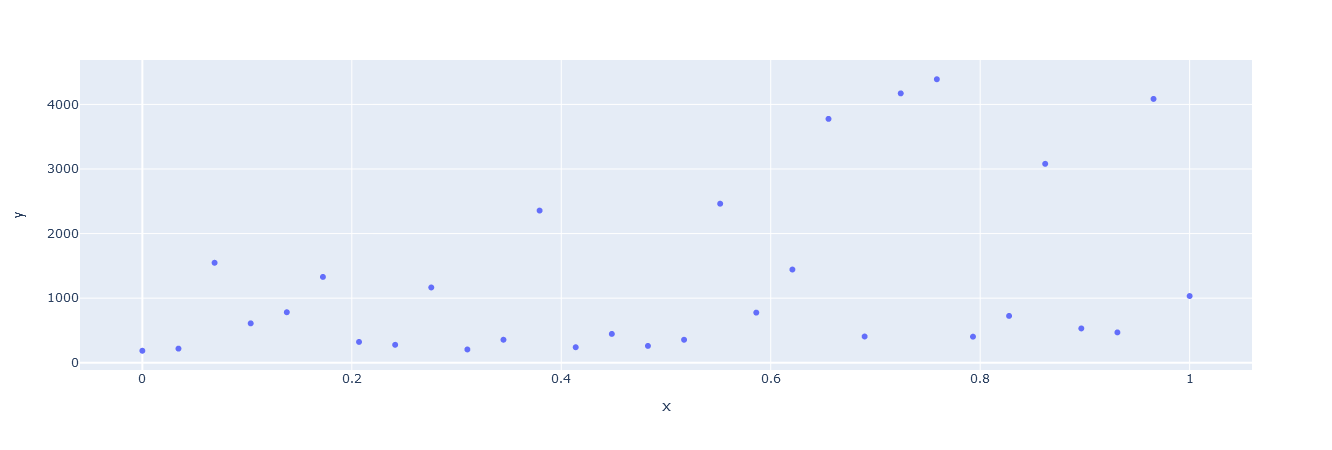

In [96]:
px.scatter(x=model_lowess_d1[:,0], y=model_lowess_d1[:,1])

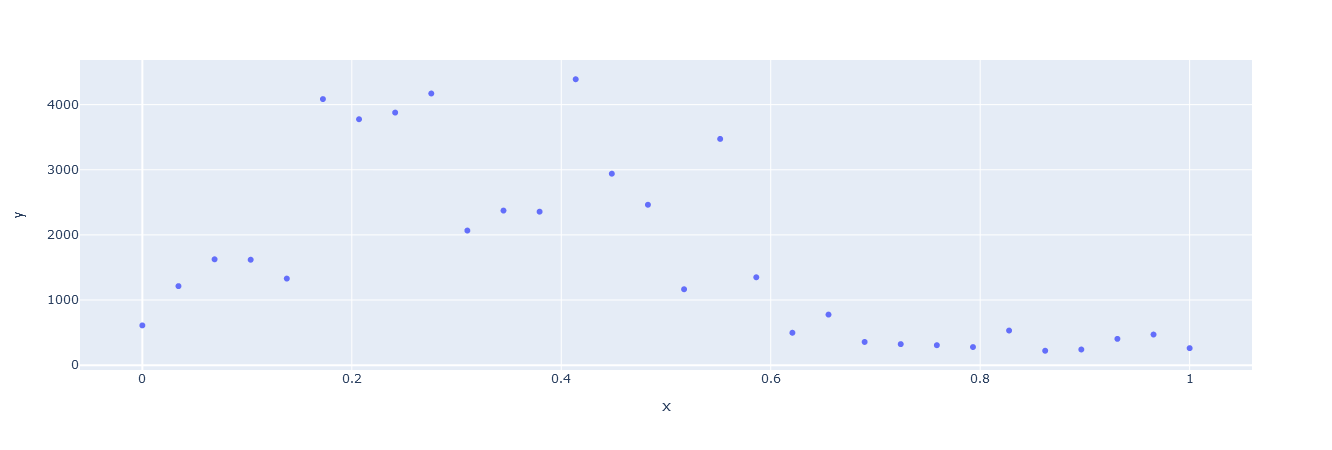

In [97]:
px.scatter(x=model_lowess_d2[:,0], y=model_lowess_d2[:,1])

# **Create a model and train it**

In [30]:
# create the two submodels    
knot_type = inputMenu(["quantile", "equidistant"], prompt="Specify knot placement type\n", lettered=True)
m1 = ( ("s(1)", "inc", 50, (1, 0), knot_type),)
m2 = ( ("s(1)", "peak", 50, (1, 0), knot_type),)
m3 = ( ("t(1,2)", "none", (10,10), (1, 0), knot_type), )

M1 = StarModel(description=m1)
M2 = StarModel(description=m2)
M3 = StarModel(description=m3)

Specify knot placement type
A. quantile
B. equidistant


 b


In [5]:
# get the optimal smoothing parameters
M1.GCV_smoothingParameter(X=model_lowess_d1[:,0].reshape(-1,1), y=model_lowess_d1[:,1], n_grid=25, p_min=1e-6)
M1.plot_GCV_curve()
print(M1)
M2.GCV_smoothingParameter(X=model_lowess_d2[:,0].reshape(-1,1), y=model_lowess_d2[:,1], n_grid=25, p_min=1e-6)
M2.plot_GCV_curve()
print(M2)
M3.GCV_smoothingParameter(X=Xtrain, y=ytrain, n_grid=25)
M3.plot_GCV_curve()
print(M3)

NameError: name 'model_lowess_d1' is not defined

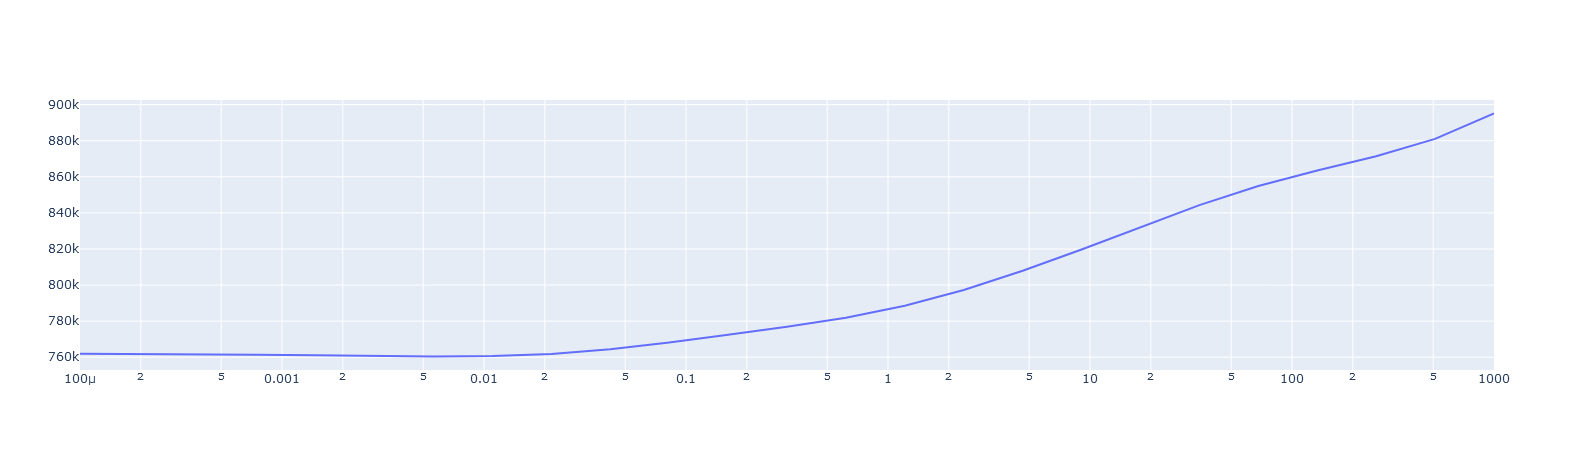

{'s(1)': {'constraint': 'inc',
          'knot_type': 'quantile',
          'lam': {'constraint': 5.623413251903491,
                  'smoothness': 0.005623413251903491},
          'n_param': 50}}


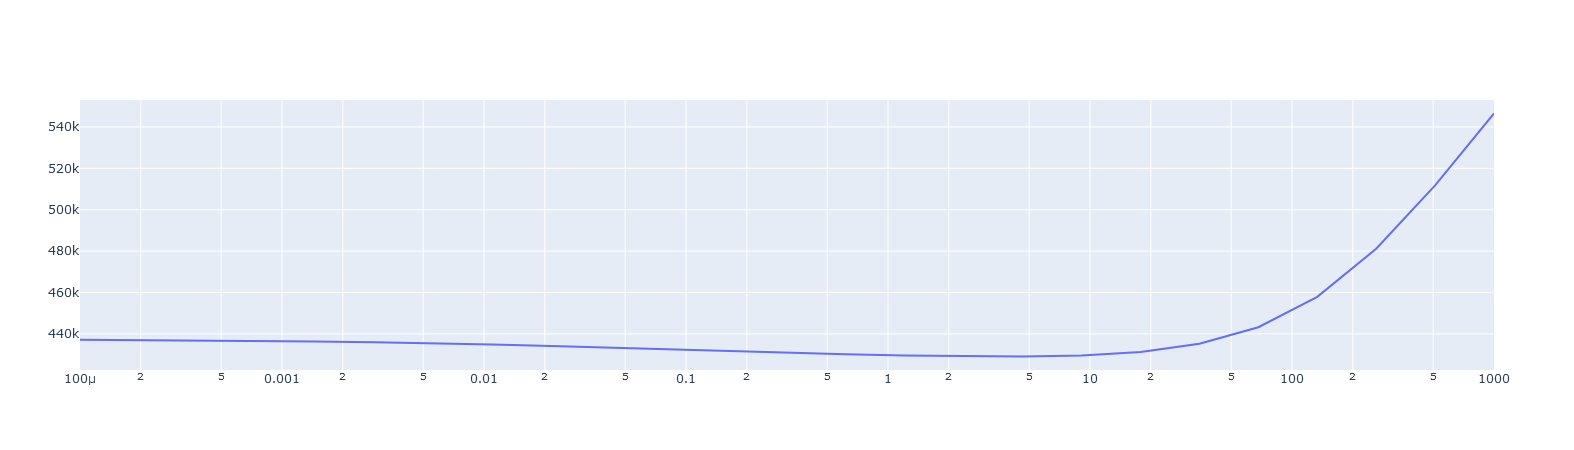

{'s(1)': {'constraint': 'peak',
          'knot_type': 'quantile',
          'lam': {'constraint': 4641.588833612782,
                  'smoothness': 4.641588833612782},
          'n_param': 50}}


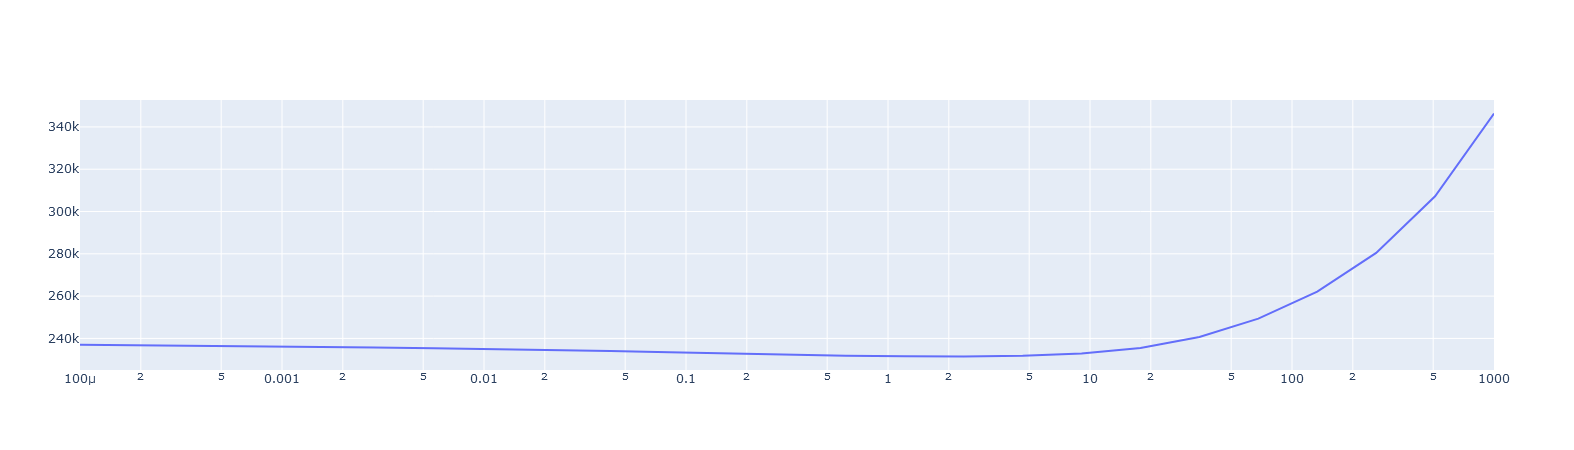

{'t(1,2)': {'constraint': 'none',
            'knot_type': 'quantile',
            'lam': {'constraint': 2371.373705661655,
                    'smoothness': 2.371373705661655},
            'n_param': (10, 10)}}


In [5]:
# get the optimal smoothing parameters
M1.GCV_smoothingParameter(X=Xtrain[:,0].reshape(-1,1), y=ytrain, n_grid=25)
M1.plot_GCV_curve()
print(M1)
M2.GCV_smoothingParameter(X=Xtrain[:,1].reshape(-1,1), y=ytrain, n_grid=25)
M2.plot_GCV_curve()
print(M2)
M3.GCV_smoothingParameter(X=Xtrain, y=ytrain, n_grid=25)
M3.plot_GCV_curve()
print(M3)

**The optimal smoothing parameters are kind of garbage because of the data**

In [6]:
# create a combined model and train it
m = ( ("s(1)", "inc", 50, (1000*M1.description_dict["s(1)"]["lam"]["smoothness"], 1000*M1.description_dict["s(1)"]["lam"]["constraint"]), knot_type), 
      ("s(2)", "peak", 50, (100*M2.description_dict["s(1)"]["lam"]["smoothness"], 1000*M2.description_dict["s(1)"]["lam"]["constraint"]), knot_type), )
      
mgridded = ( ("s(1)", "inc", 50, (M1.description_dict["s(1)"]["lam"]["smoothness"], M1.description_dict["s(1)"]["lam"]["constraint"]), knot_type), 
             ("s(2)", "peak", 50, (M2.description_dict["s(1)"]["lam"]["smoothness"], M2.description_dict["s(1)"]["lam"]["constraint"]), knot_type), )
if dtype == "gridded":
    m = mgridded
M = StarModel(description=m)
M.fit(X=Xtrain, y=ytrain, plot_=False, global_pos=True)
ypred = M.predict(X=Xtest)
print("Constraint Model:".center(80, "="), "\n", M)

Nr of predictions smaller than zero before iteration 0: 87
Nr of predictions smaller than zero before iteration 1: 317
Nr of predictions smaller than zero before iteration 2: 245
Nr of predictions smaller than zero before iteration 3: 166
Nr of predictions smaller than zero before iteration 4: 190
Nr of predictions smaller than zero before iteration 5: 134
Nr of predictions smaller than zero before iteration 6: 184
Nr of predictions smaller than zero before iteration 7: 177
===============================Constraint Model:================================ 
 {'s(1)': {'constraint': 'inc',
          'knot_type': 'quantile',
          'lam': {'constraint': 5623.413251903491,
                  'smoothness': 5.623413251903491},
          'n_param': 50},
 's(2)': {'constraint': 'peak',
          'knot_type': 'quantile',
          'lam': {'constraint': 4641588.833612782,
                  'smoothness': 464.1588833612782},
          'n_param': 50}}


In [9]:
# create the unconstraint model
m_unconstraint = ( ("s(1)", "none", 50, (1000*M1.description_dict["s(1)"]["lam"]["smoothness"], 0), knot_type),
                   ("s(2)", "none", 50, (100*M2.description_dict["s(1)"]["lam"]["smoothness"], 0), knot_type),)
mgridded_unc = ( ("s(1)", "inc", 50, (M1.description_dict["s(1)"]["lam"]["smoothness"], 0), knot_type), 
                 ("s(2)", "peak", 50,(M2.description_dict["s(1)"]["lam"]["smoothness"], 0), knot_type), )
if dtype == "gridded":
    m_unconstraint = mgridded_unc
M_unconstraint = StarModel(description=m_unconstraint)
M_unconstraint.fit(X=Xtrain, y=ytrain, plot_=False, global_pos=True)
ypred_unconstraint = M_unconstraint.predict(X=Xtest)
print("Unconstraint Model:".center(80, "="), "\n", M_unconstraint)

Nr of predictions smaller than zero before iteration 0: 87
==============================Unconstraint Model:=============================== 
 {'s(1)': {'constraint': 'none',
          'knot_type': 'quantile',
          'lam': {'constraint': 0, 'smoothness': 5.623413251903491},
          'n_param': 50},
 's(2)': {'constraint': 'none',
          'knot_type': 'quantile',
          'lam': {'constraint': 0, 'smoothness': 464.1588833612782},
          'n_param': 50}}


In [10]:
# create a tensor-product spline model
m_t = (("t(1,2)", "inc_1", (10,10), (M3.description_dict["t(1,2)"]["lam"]["smoothness"], M3.description_dict["t(1,2)"]["lam"]["constraint"]), knot_type),)
mgridded_t = (("t(1,2)", "inc_1", (10,10), (M3.description_dict["t(1,2)"]["lam"]["smoothness"], M3.description_dict["t(1,2)"]["lam"]["constraint"]), knot_type),)

if dtype=="gridded":
    m_t = mgridded_t

M_t = StarModel(description=m_t) 
M_t.fit(X=Xtrain, y=ytrain, plot_=False, global_pos=True)
ypred_t = M_t.predict(X=Xtest)
print("Constraint TPS Model:".center(80, "="), "\n", M_t)

Nr of predictions smaller than zero before iteration 0: 2
Nr of predictions smaller than zero before iteration 1: 1
Nr of predictions smaller than zero before iteration 2: 30
Nr of predictions smaller than zero before iteration 3: 104
Nr of predictions smaller than zero before iteration 4: 105
Nr of predictions smaller than zero before iteration 5: 189
Nr of predictions smaller than zero before iteration 6: 227
Nr of predictions smaller than zero before iteration 7: 242
Nr of predictions smaller than zero before iteration 8: 464
Nr of predictions smaller than zero before iteration 9: 526
=============================Constraint TPS Model:============================== 
 {'t(1,2)': {'constraint': 'inc_1',
            'knot_type': 'quantile',
            'lam': {'constraint': 2371.373705661655,
                    'smoothness': 2.371373705661655},
            'n_param': (10, 10)}}


In [12]:
m_t_unc = ( ("t(1,2)", "none", (10,10), (M3.description_dict["t(1,2)"]["lam"]["smoothness"], 0), knot_type),)
mgridded_t_unc = ( ("t(1,2)", "none", (10,10), (M3.description_dict["t(1,2)"]["lam"]["smoothness"], 0), knot_type),)

if dtype=="gridded":
    m_t_unc = mgridded_t_unc
    
M_t_unc = StarModel(description=m_t_unc)
M_t_unc.fit(X=Xtrain, y=ytrain, plot_=False, global_pos=False)
ypred_t_unc = M_t_unc.predict(X=Xtest)
print("Unconstraint TPS Model:".center(80, "="), "\n", M_t_unc)

============================Unconstraint TPS Model:============================= 
 {'t(1,2)': {'constraint': 'none',
            'knot_type': 'quantile',
            'lam': {'constraint': 0, 'smoothness': 2.371373705661655},
            'n_param': (10, 10)}}


In [13]:
print("MSE on Train Set".center(80, "="))
print("Constraint Model =".ljust(30), mean_squared_error(M.basis@M.coef_, ytrain))
print("Unconstraint Model =".ljust(30), mean_squared_error(M_unconstraint.basis@M_unconstraint.coef_, ytrain))
print("Constraint TPS Model = ".ljust(30), mean_squared_error(M_t.basis@M_t.coef_, ytrain))
print("Unconstraint TPS Model = ".ljust(30), mean_squared_error(M_t_unc.basis@M_t_unc.coef_, ytrain))

================================MSE on Train Set================================
Constraint Model =             537169.9740202518
Unconstraint Model =           447580.76646757254
Constraint TPS Model =         1287249.7409789995
Unconstraint TPS Model =       218324.35407194225


In [14]:
print("MSE on Test Set".center(80, "="))
print("Constraint Model =".ljust(30), mean_squared_error(ypred, ytest))
print("Unconstraint Model =".ljust(30), mean_squared_error(ypred_unconstraint, ytest))
print("Constraint TPS Model = ".ljust(30), mean_squared_error(ypred_t, ytest))
print("Unconstraint TPS Model = ".ljust(30), mean_squared_error(ypred_t_unc, ytest))

================================MSE on Test Set=================================
Constraint Model =             687753.7355754798
Unconstraint Model =           598189.8045865635
Constraint TPS Model =         1518438.5597348947
Unconstraint TPS Model =       234424.91325966557


In [15]:
print("Degrees of Freedome".center(80, "="))
print("Constraint Model: ".ljust(30), np.trace(M.calc_hat_matrix()))
print("Unconstraint Model: ".ljust(30), np.trace(M_unconstraint.calc_hat_matrix()))
print("Constraint TPS Model: ".ljust(30), np.trace(M_t.calc_hat_matrix()))
print("Unconstraint TPS Model: ".ljust(30), np.trace(M_t_unc.calc_hat_matrix()))

==============================Degrees of Freedome===============================
Constraint Model:              13.740727538013552
Unconstraint Model:            24.606510066020185
Constraint TPS Model:          38.126139286137175
Unconstraint TPS Model:        53.88947671051773


In [16]:
def AIC(model, ytest=ytest, Xtest=Xtest):
    # Fahrmeir
    dof = np.trace(model.calc_hat_matrix())
    sigma_ML = np.sum((ytest - model.predict(Xtest))**2)
    sigma_REML = sigma_ML / (len(ytest) - dof)
    
    AIC = len(ytest)*np.log(sigma_REML) + 2*(dof+1)
    return AIC
        
print("AIC".center(80, "="))
print("Constraint Model: ".ljust(30), AIC(model=M))
print("Unconstraint Model: ".ljust(30), AIC(model=M_unconstraint))
print("Constraint TPS Model: ".ljust(30), AIC(model=M_t))
print("Unconstraint TPS Model: ".ljust(30), AIC(model=M_t_unc))

======================================AIC=======================================
Constraint Model:              2852.9026007431494
Unconstraint Model:            2857.4404761871083
Constraint TPS Model:          3095.0840392649575
Unconstraint TPS Model:        2756.3641263768054


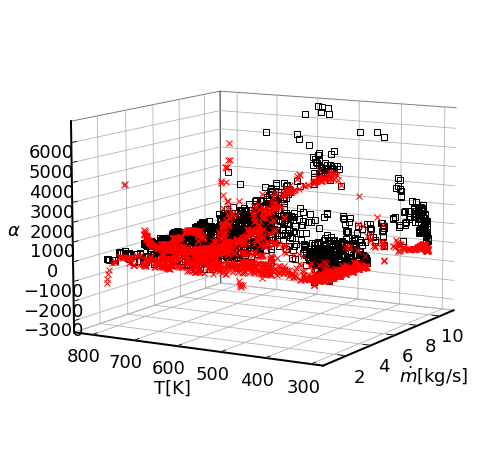

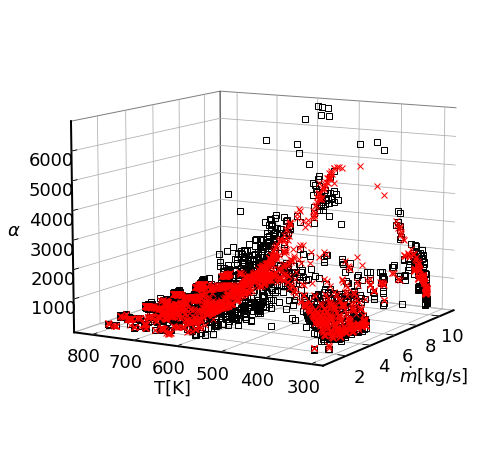

In [19]:
plot_model(Mod=M_t, partition=0)
plot_model(Mod=M_t_unc, partition=0)


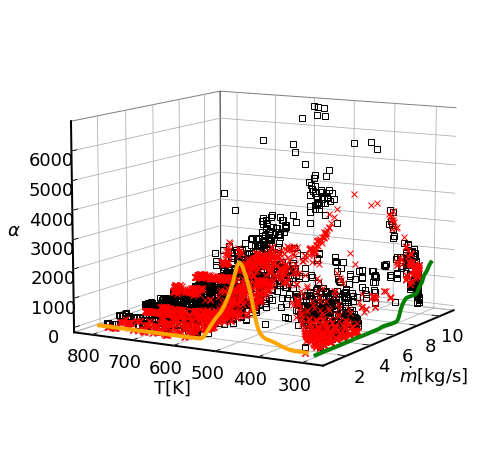

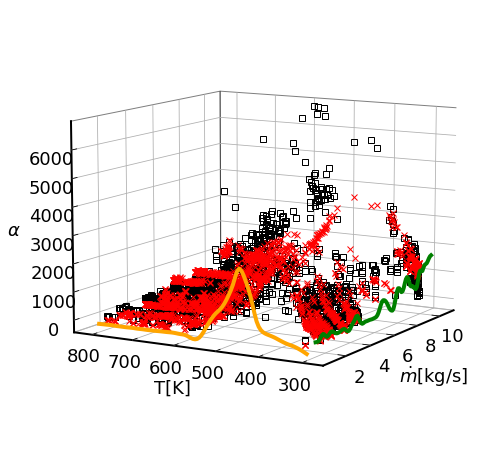

In [20]:
plot_model(Mod=M, partition=1)
plot_model(Mod=M_unconstraint, partition=1)

In [18]:
def plot_model(Mod, partition=True, fname=False):
    fig = plt.figure(figsize=(14,8))
    ax = fig.gca(projection='3d')

    ax.grid(True)
    ax.xaxis.pane.set_edgecolor("black")
    ax.yaxis.pane.set_edgecolor("black")
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    ax.xaxis._axinfo["tick"]["inward_factor"] = 0
    ax.xaxis._axinfo["tick"]["outward_factor"] = 0.4
    ax.yaxis._axinfo["tick"]["inward_factor"] = 0
    ax.yaxis._axinfo["tick"]["outward_factor"] = 0.4

    ax.zaxis._axinfo["tick"]["inward_factor"] = 0
    ax.zaxis._axinfo["tick"]["outward_factor"] = 0
    ax.zaxis._axinfo["tick"]["outward_factor"] = 0.4

    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_locator(MultipleLocator(100))
    ax.zaxis.set_major_locator(MultipleLocator(1000))

    # plot the fit
    ax.plot(xs=Xmin[0] + Xtrain[:,0]*(Xmax[0]-Xmin[0]), ys=Xmin[1]+Xtrain[:,1]*(Xmax[1]-Xmin[1]), zs=ytrain, marker="s", 
            label="Data", color="black", markersize=6, markerfacecolor='none', markeredgecolor="black", linewidth=0)
    ax.plot(xs=Xmin[0] + Xtrain[:,0]*(Xmax[0]-Xmin[0]), ys=Xmin[1]+Xtrain[:,1]*(Xmax[1]-Xmin[1]), zs=Mod.basis@Mod.coef_, 
            label="Fit", marker="x", color="red", markersize=6, markerfacecolor='none', markeredgecolor="red", linewidth=0)
    
    if partition:
        # plot the individual parts of the fit
        xplot_m, xplot_T = np.linspace(0,1,100), np.linspace(0,1,100)
        B_T, B_m = Bspline(), Bspline()
        B_T.bspline_basis(x_data=xplot_T, k=Mod.smooths["s(1)"].n_param)
        B_m.bspline_basis(x_data=xplot_m, k=Mod.smooths["s(2)"].n_param)
        s1 = B_m.basis @ Mod.smooths["s(1)"].coef_
        s2 = B_T.basis @ Mod.smooths["s(2)"].coef_
        ax.plot(xs=Xmin[0]+xplot_m*(Xmax[0] - Xmin[0]), ys=np.ones(100)*(Xmin[1]-20), zs=s1, linewidth=4, label=r"$s_1(x_1)$", color="green")
        ax.plot(xs=np.ones(100)*Xmin[0], ys=Xmin[1]+xplot_T*(Xmax[1]-Xmin[1]), zs=s2, linewidth=4, label=r"$s_1(x_1)$", color="orange")

    ax.xaxis.set_rotate_label(False)
    ax.set_xlabel(r"$\dot{m}$[kg/s]", labelpad=16, rotation=0)
    ax.yaxis.set_rotate_label(False)
    ax.set_ylabel(r"T[K]", labelpad=12, rotation=0)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r"$\alpha$", labelpad=12, rotation=0)

    ax.view_init(elev=10, azim=100+110)
    
    if fname: 
        path = '..\\..\\Thesis_WorkingDirectory\\thesisplots\\Ebner\\'
        print(f"Save Figure to {path+fname}")
        plt.savefig(path+fname, transparent=False, bbox_inches='tight')


In [22]:
def plot_model_plotly(Mod):
    fig = make_subplots(rows=1, cols=2, 
                        specs=[[{"type": "scene"}, {"type": "scene"}]])
    #fig.add_trace(go.Surface(x=xgrid, y=ygrid, z=zgrid))
    fig.add_trace(go.Scatter3d(x=Xtrain[:,0], y=Xtrain[:,1], z=ytrain, mode="markers", marker=dict(size=2, color="black", symbol="x"), name="data"), row=1, col=1)
    fig.add_trace(go.Scatter3d(x=Xtrain[:,0], y=Xtrain[:,1], z=Mod.basis @ Mod.coef_, mode="markers", marker=dict(size=2, color="red"), name="fit"), row=1, col=1)
    fig.update_layout(xaxis_title="QDot",
                      yaxis_title="T",
                      font=dict(size=18,color="black"))
    fig.layout.legend.itemsizing = "constant"

    # plot individual parts
    
    #z_s1 = Mod.smooths["s(1)"].basis @ Mod.smooths["s(1)"].coef_
    #z_s2 = Mod.smooths["s(2)"].basis @ Mod.smooths["s(2)"].coef_
    #z_t12 = Mod.smooths["t(1,2)"].basis @ Mod.smooths["t(1,2)"].coef_
    
    for smooth in Mod.smooths.keys():
        z = Mod.smooths[smooth].basis @ Mod.smooths[smooth].coef_
        fig.add_trace(go.Scatter3d(x=Xtrain[:,0], y=Xtrain[:,1], z=z, mode="markers", marker=dict(size=2), name=smooth), row=1, col=2)
 
    fig.update_layout(xaxis_title="QDot",
                      yaxis_title="T",
                      font=dict(size=18,color="black"))
    fig.layout.legend.itemsizing = "constant"
    fig.update_layout(height=700, width=1000)
    #fig.write_html("img/Fit_partition.html")
    fig.show()

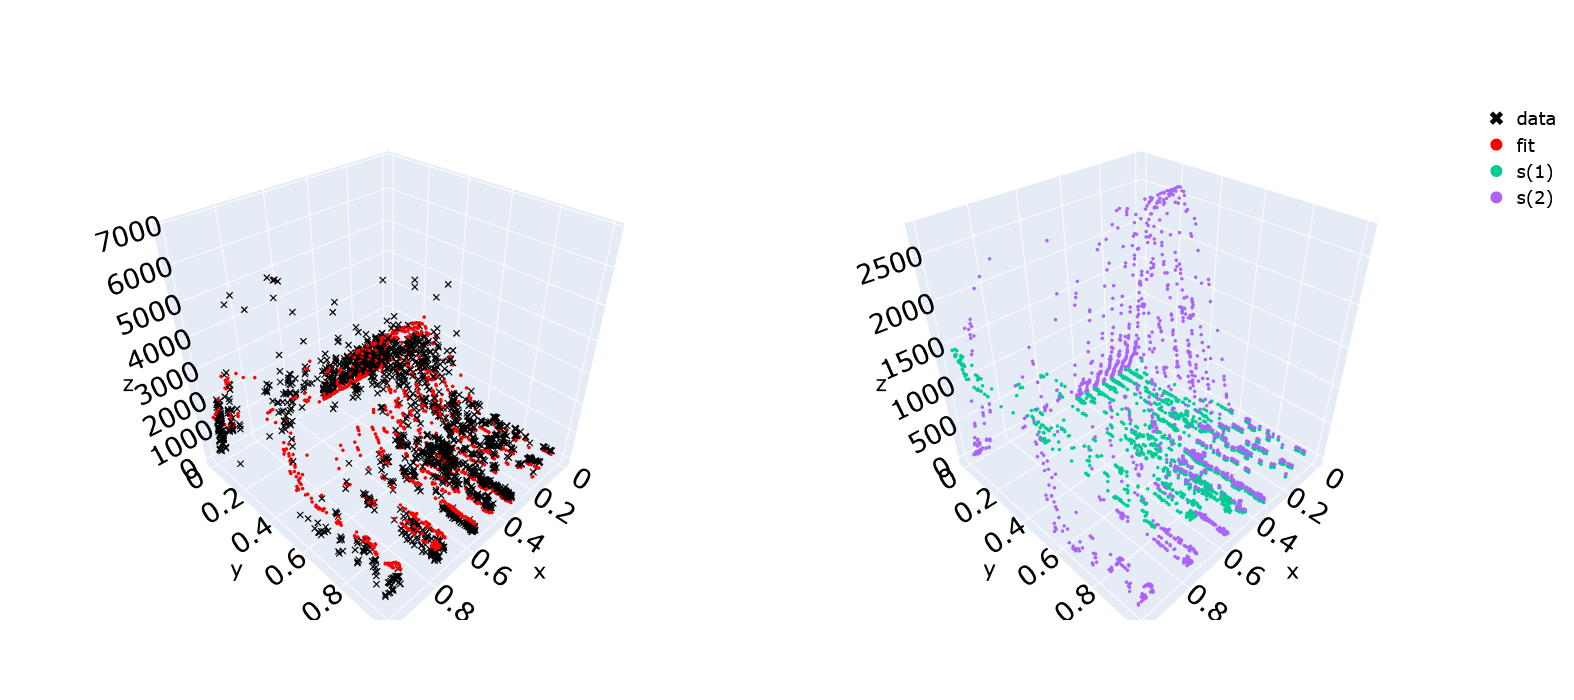

In [23]:
plot_model_plotly(M)

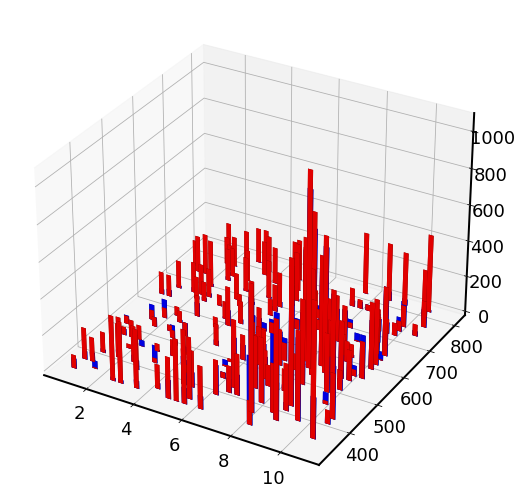

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111, projection='3d')

res = abs(ytest - ypred)
res_unc = abs(ytest - ypred_unconstraint)
ax1.bar3d(x=Xmin[0]+Xtest[:,0]*(Xmax[0]-Xmin[0]), y=Xmin[1]+Xtest[:,1]*(Xmax[1]-Xmin[1]), z=np.zeros(Xtest.shape[0]), dx=0.2, dy=0.2, dz=res, color="red")
ax1.bar3d(x=Xmin[0] + (Xtest[:,0])*(Xmax[0]-Xmin[0]), y=Xmin[1]+(Xtest[:,1])*(Xmax[1]-Xmin[1]), z=np.zeros(Xtest.shape[0]), dx=0.22, dy=0.22, dz=res_unc, color="blue")

plt.show()